In [2]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from chxanalys.chx_xpcs_xsvs_jupyter_V1 import *

In [3]:
%matplotlib inline

In [4]:
scat_geometry ='saxs'
qphi_analysis = False
run_t_ROI_Inten = True
use_sqnorm = True
use_imgsum_norm = True
run_one_time = True
bad_frame_list = None
good_start = 0
fit_g2_func = 'stretched'

run_two_time =   True    #run  two-time
run_four_time = False #True #False   #run  four-time
run_xsvs=  False #False         #run visibility analysis
att_pdf_report = True    #attach the pdf report to CHX olog
qth_interest = 1 #the intested single qth             
use_sqnorm = True    #if True, use sq to normalize intensity
use_imgsum_norm= True  #if True use imgsum to normalize intensity for one-time calculatoin
pdf_version='_%s'%get_today_date()     #for pdf report name
run_dose = False #False #True  #run dose_depend analysis

if scat_geometry == 'gi_saxs':run_xsvs= False;use_sqnorm=False
if scat_geometry == 'gi_waxs':use_sqnorm = False;
if scat_geometry != 'saxs':qphi_analysis = False;scat_geometry_ = scat_geometry  
else:scat_geometry_ = ['','ang_'][qphi_analysis]+ scat_geometry


In [388]:
#Sample info

T= True
F = False


#chx_THL230_15s_11_W0028_H11-171113-172644-1.csv
#--> count : 1 ['8452c7'] (scan num: 9195) (Measurement: Timpix3 1s series file chx_THL230_11s_10: exp_1s Silica 250 nm diam, stock solution in water )
    
sam = dict(  
run11 =  'chx_THL230_15s_11_W0028_H11-171113-172644-1.csv',
run16 = 'chx_THL230_15s_16_W0028_H11-171114-041148-1.csv', 
run20 = 'chx_THL230_3600s_20_W0028_H11-171114-063246.csv',    
    
mask  =  'W0028_H11_trimdacs.txt'
    
)    

#save_dict_csv(sam, out_dir0 + 'sample_info.csv')

data_dir = '/XF11ID/analysis/2017_3/Timepix/Data/'
out_dir0 = '/XF11ID/analysis/2017_3/Timepix/Results/'

out_dir0 = '/home/yuzhang/Analysis/Timepix/2017_3/Results/'




In [7]:
cd /XF11ID/analysis/2017_3/Timepix/Data/

/XF11ID/analysis/2017_3/Timepix/Data


In [8]:
ls

chx_THL230_15s_11_W0028_H11-171113-172644-1.csv
chx_THL230_15s_16_W0028_H11-171114-041148-1.csv
chx_THL230_300s_12_W0028_H11-171114-005224.csv
chx_THL230_300s_13_W0028_H11-171114-015054.csv
chx_THL230_300s_15_W0028_H11-171114-031958.csv
chx_THL230_3600s_20_W0028_H11-171114-063246.csv
chx_THL230_420s_19_W0028_H11-171114-055948-1.csv
chx_THL230_600s_17_W0028_H11-171114-054448.csv
chx_THL230_600s_18_W0028_H11-171114-055707.csv
data_12.zip
data_13.zip
data_15.zip
data_16.zip
data_17.zip
data_20.zip
uid=run11_fra_0_100_tbins=10.000_ms_Q_Rate_fit.png
uid=run16_fra_0_166999_tbins=0.010_ms_Q_Rate_fit.png
uid=run16_fra_0_333999_tbins=0.005_ms_Q_Rate_fit.png
W0028_H11_trimdacs.txt


In [9]:
#sam

In [10]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
#%reset -f  #for clean up things in the memory
import pandas as pds

## Provide sample filename here

In [389]:
run = '11'
run = '16'
run = '20'
thresh = 230
uid = 'run%s'%run
fp = sam[ uid ]
print( uid, fp  ) 

out_dir = os.path.join(out_dir0, '%s/'%uid)
os.makedirs(out_dir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' %out_dir)
uidstr = 'uid=%s'%uid

run20 chx_THL230_3600s_20_W0028_H11-171114-063246.csv
Results from this analysis will be stashed in the directory /home/yuzhang/Analysis/Timepix/2017_3/Results/run20/


# Get Data

In [390]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/xpcs_timepixel.py

In [391]:
time_unit = 25/4096/1e9#  * this time_unit to make scale in s
print(time_unit)


6.103515625e-12


In [593]:
x,y,tt0 = get_timepixel_data( data_dir, fp,time_unit=1 )
t = tt0 * time_unit
#print( 'The max time is %s ms' %( t.max()*6.1/1e9) )

In [393]:
print( 'The time duration is %s s.' %t.max()  )

The time duration is 3641.79592633 s.


In [394]:
#plot1D(t)

In [395]:
#Due to shutter open chose data from 100 to -100

In [396]:
if False:
    x = x[100:-100]
    y = y[100:-100]
    t = t[100:-100]

# Get Time~Intensity Plot

In [1113]:
tbin_step = 0.001 * 1  #in unit of s
times0, imgsum0 = get_his_taus( t, bin_step = tbin_step )
#times in ms
print(times0.shape) 
timeperframe =  tbin_step 
print ( timeperframe)

(3641795,)
0.001


In [693]:
plot1D( x = times0, y= imgsum0 , m='o', c='b', ls = '--',save=True, path= out_dir,
     title='%s_imgsum_time'%uid, xlabel = r"$time $ $(s)$", ylabel = 'Photon Counts of Image Sum' ) 

<IPython.core.display.Javascript object>

In [18]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/chx_generic_functions.py

# Get/Create Mask

In [1273]:
m = np.loadtxt( data_dir + sam['mask'])

In [1274]:
#mask = np.zeros( [256, 256] )
mask = 1 - m[:,3].reshape( [256, 256 ])

In [1275]:
edg = 2
mask[:edg,:] = 0
mask[-edg:,:] = 0
mask[:,:edg] = 0
mask[:,-edg:] = 0

<IPython.core.display.Javascript object>


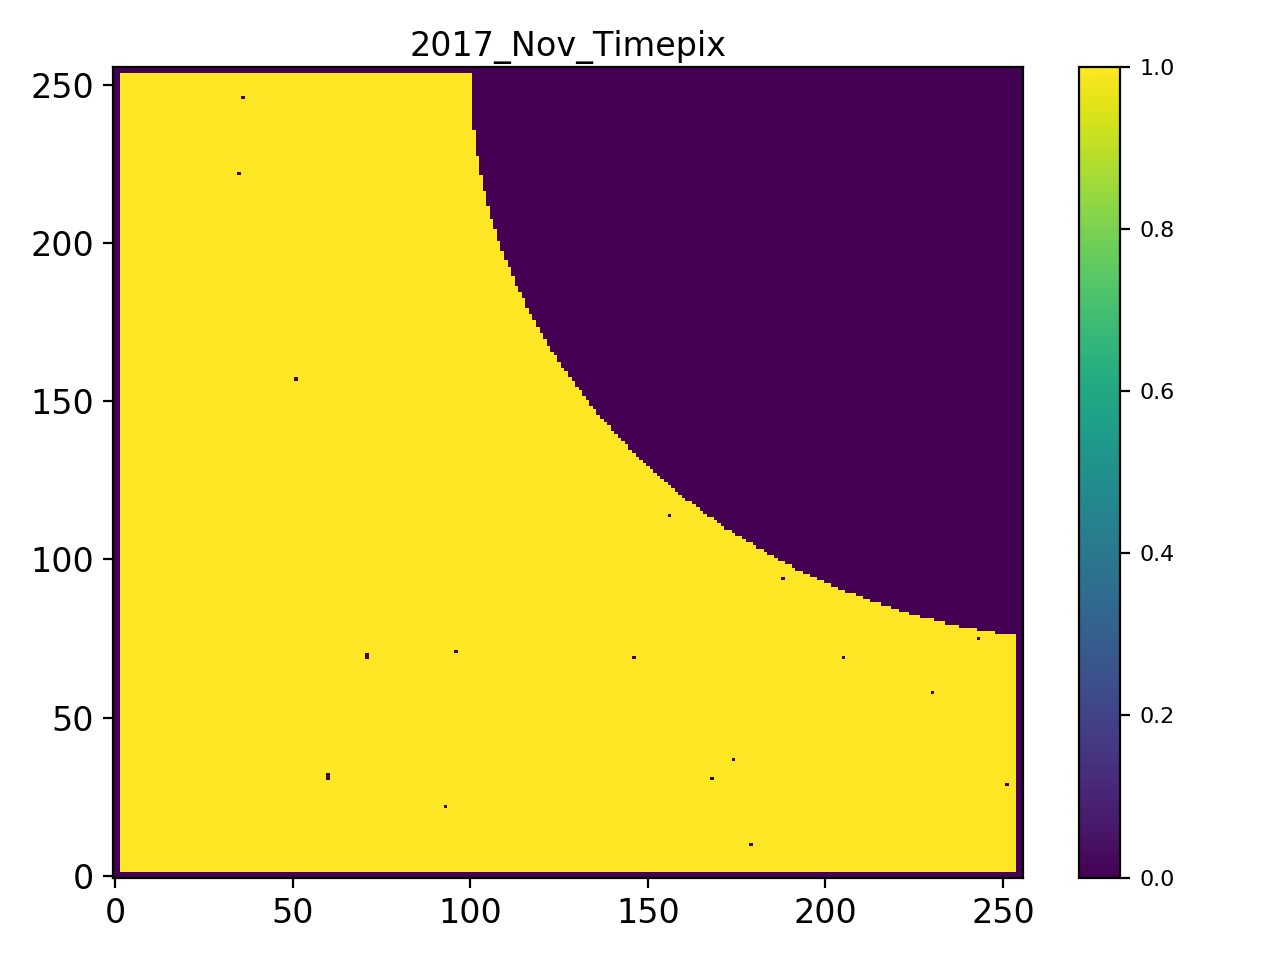

In [1276]:
show_img( mask, image_name='2017_Nov_Timepix' )

In [1278]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/xpcs_timepixel.py

# Get Averaged Image

In [1279]:
avg_img = get_timepixel_avg_image( xeff,yeff,teff,  delta_time = None ) * mask

The max photon count is 373.


<IPython.core.display.Javascript object>


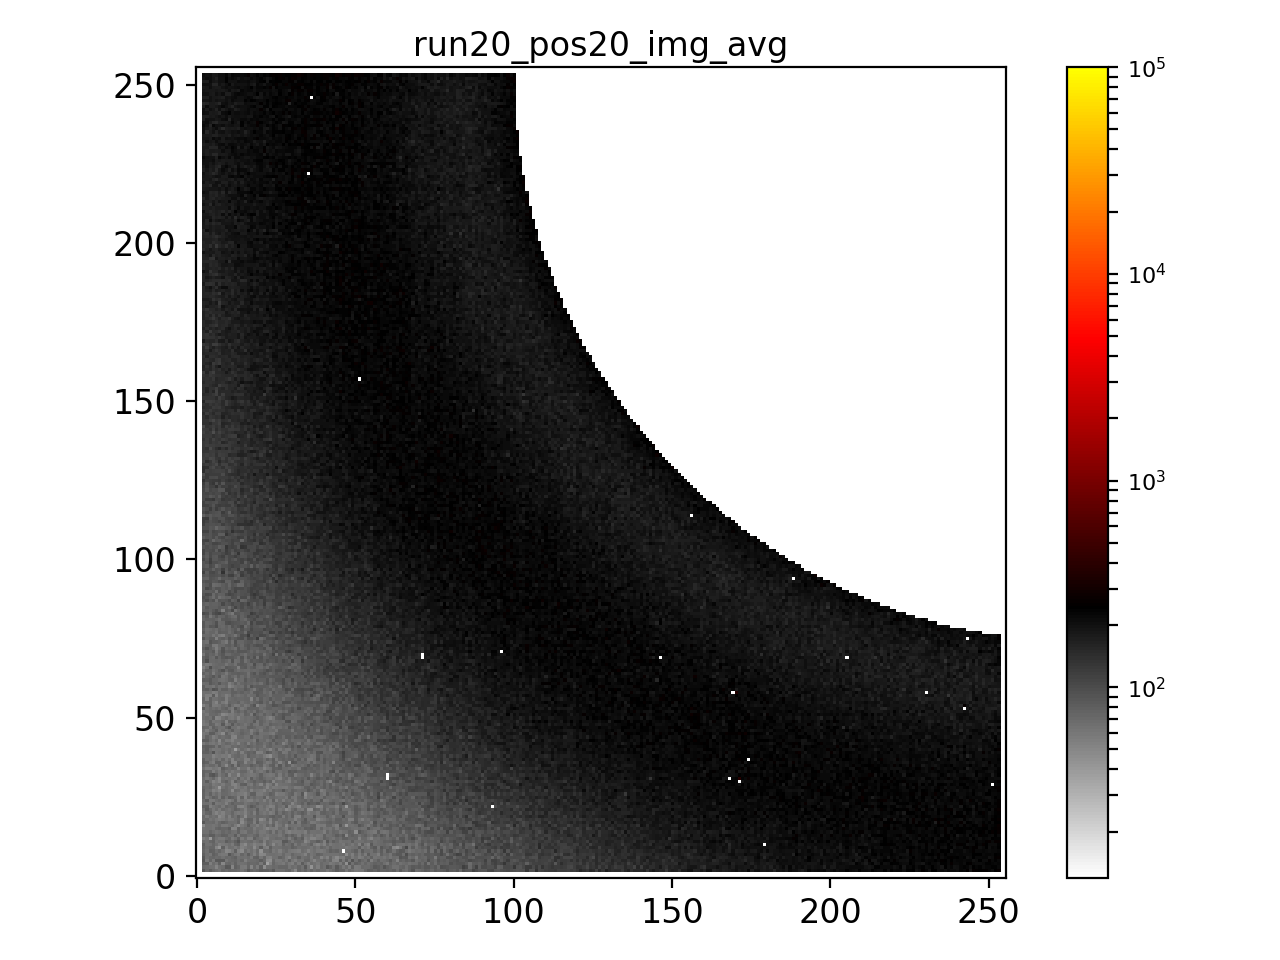

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [1280]:
show_img( avg_img,  alpha=0.8, vmin=12, vmax= 1e5, logs=True, aspect=1,  
          
         image_name= '%s_img_avg'%uid,  save=True, path= out_dir,  cmap = cmap_albula )

# Get better center position
### center0 is the image x, center1 is the image y

In [1281]:
cx0, cy0 = [280, 254 +2  ]  #cx0 is the image y, cy0 is the image x
center=[cy0,cx0]  #center0 is the image x, center1 is the image y

In [1282]:
Nr = 0
r1ds = np.zeros([ (2*Nr+1)**2, 4])
i=0
for cx_ in range(-Nr, Nr+1):
    for cy_ in range(-Nr, Nr+1):
        cx, cy = [cx0 - cx_  , cy0 - cy_   ]
        center=[cy,cx]
        rmk = create_ring_mask( [256, 256],  282, 292, center= center ) * mask
        r1d = avg_img[np.array(rmk, dtype=bool) ].ravel()
        r1ds[i] = [ r1d.mean(), r1d.std(), cx, cy ]
        #print( cx, cy, r1d.mean(), r1d.std()  )
        i +=1
        #plot1D(  r1d, c='b', m='o', title='cx=%s, cy=%s'%(cx,cy)  )
        #print(i, )

In [1283]:
c1,c2 = np.argmax( r1ds[:,0] ), np.argmin( r1ds[:,1] )
print(c1,c2)

0 0


In [1284]:
r1ds[c1], r1ds[c2]

(array([ 159.92851274,   25.27261031,  280.        ,  256.        ]),
 array([ 159.92851274,   25.27261031,  280.        ,  256.        ]))

In [1285]:
center = r1ds[c1][2:]
print(center)

[ 280.  256.]


In [955]:
center = [ 256, 280 ] #center0 is the image x, center1 is the image y  #actually this is good!

<IPython.core.display.Javascript object>


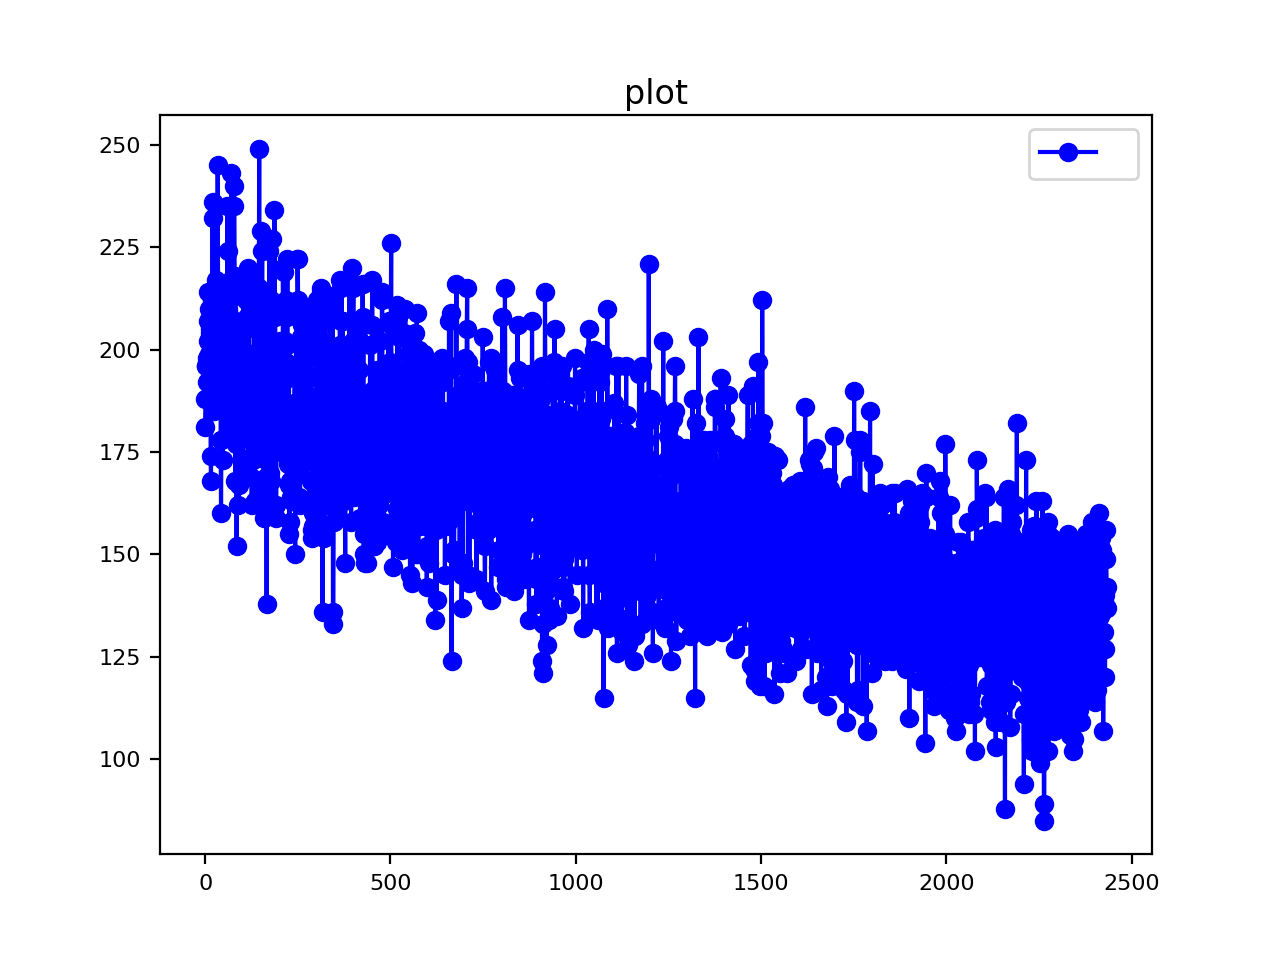

In [956]:
rmk = create_ring_mask( [256, 256],  282, 292, center= center ) * mask
r1d = avg_img[np.array(rmk, dtype=bool) ].ravel()
plot1D(  r1d, c='b', m='o'  )

In [957]:
avg_img = get_timepixel_avg_image( xeff,yeff,teff,  delta_time = None )  

The max photon count is 373.


<IPython.core.display.Javascript object>


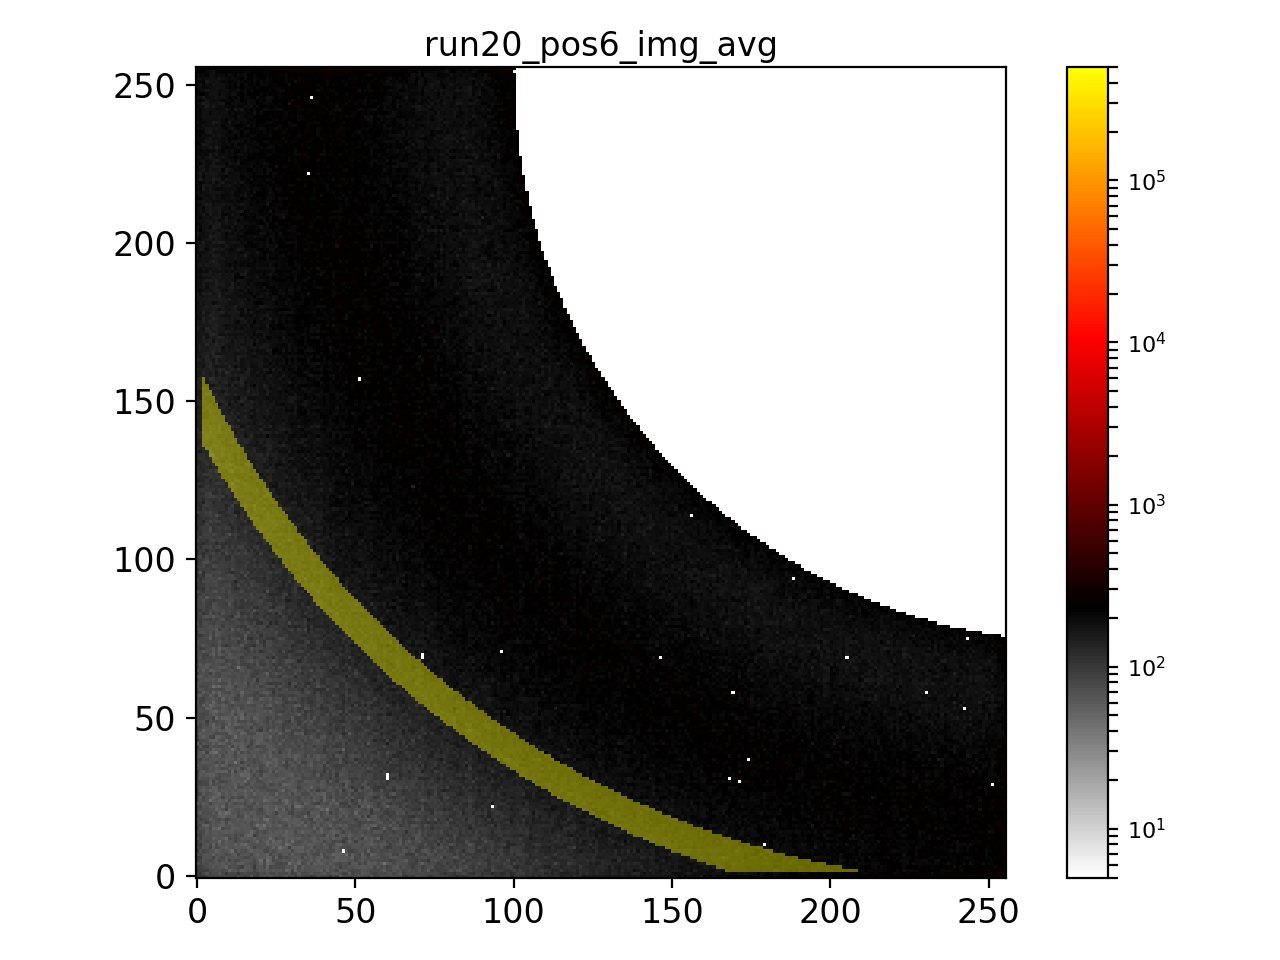

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [958]:
show_img( avg_img, label_array = rmk, alpha=0.4, vmin=5, vmax= 5e5, logs=True, aspect=1, center= center[::-1],           
         image_name= '%s_img_avg'%uid,  save=True, path= out_dir,  cmap = cmap_albula )

# Do a circular average

In [959]:
center

[256, 280]

In [960]:
setup_pargs = {'Ldet': 16035 + 0,  'center': center,
               'dpix': 0.046,  #what's pixel size, should be 45 um???
               'exposuretime':  0.001, 'lambda_': 1.28481,
            'path': out_dir,  
               'uid': 'uid=run%s'%run}

In [961]:
#avg_img_ = FD.rdframe(0) * mask

In [962]:
#avg_img_ =  get_avg_imgc(FD,sampling=1)

<IPython.core.display.Javascript object>


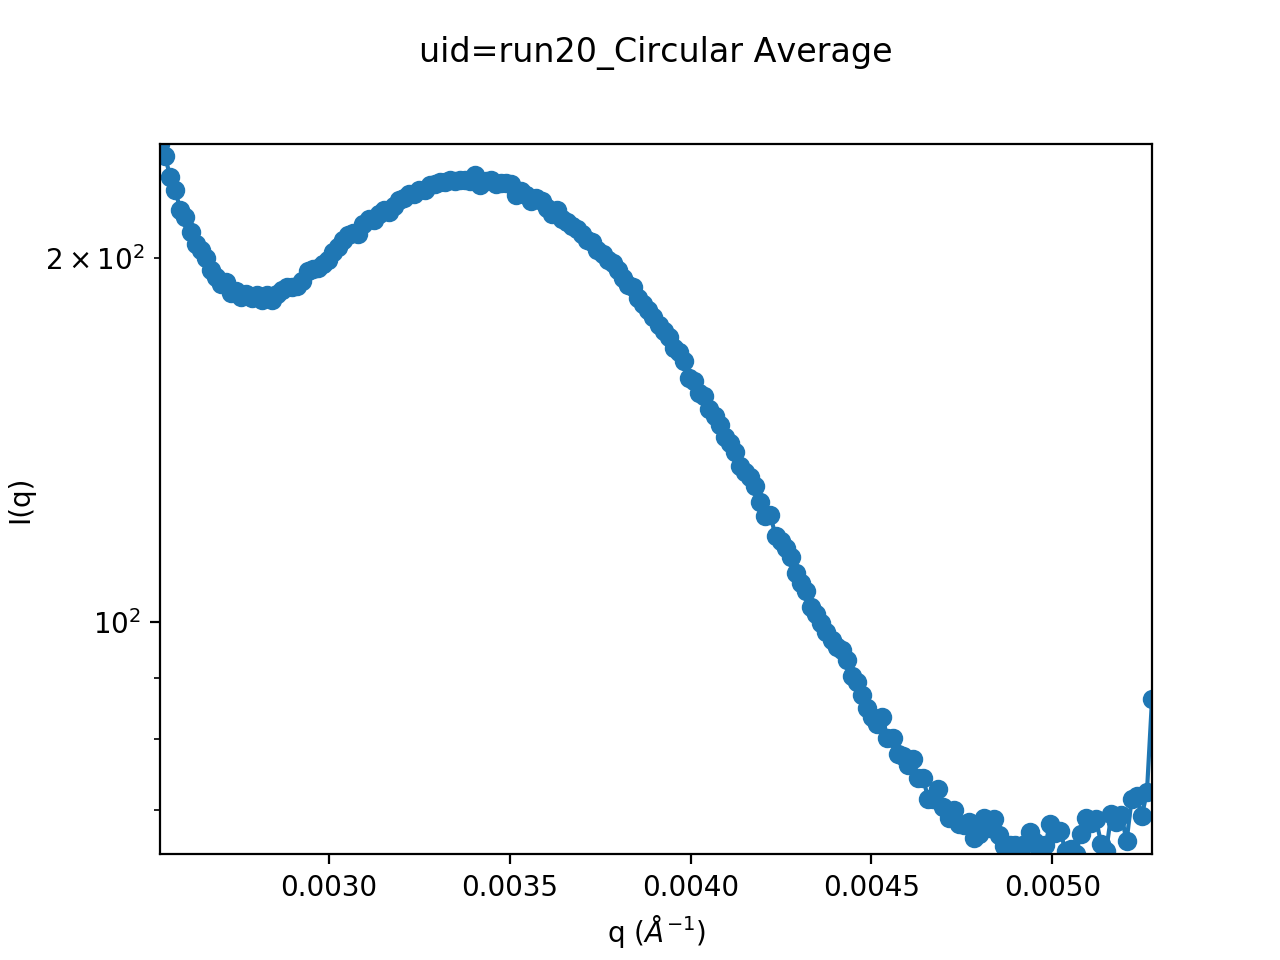

In [963]:
qp_saxs, iq_saxs, q_saxs = get_circular_average( avg_img, mask, pargs=setup_pargs  )
plot_circular_average( qp_saxs, iq_saxs, q_saxs,  pargs=setup_pargs,  
                  xlim=[q_saxs.min(), q_saxs.max()*1.0], ylim = [iq_saxs.min(), iq_saxs.max()] )

In [964]:
iq_dir = '/XF11ID/analysis/2017_3/yuzhang/Results/cb9605/'
fuid = 'cb9605fa-b9ea-41fb-afb1-3940ecc0fa84'
extract_dict = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%fuid, import_dir = iq_dir )

In [965]:
extract_dict.keys()

dict_keys(['pixel_mask', 'taus', 'iqst', 'qt', 'iq_saxs', 'qval_dict_v', 'g2', 'avg_img', 'qval_dict', 'taus_uids', 'bad_frame_list', 'qval_dict_p', 'g2_uids', 'md', 'roi_mask', 'mean_int_sets', 'imgsum', 'mask', 'g2_fit_paras', 'q_saxs', 'times_roi'])

<IPython.core.display.Javascript object>


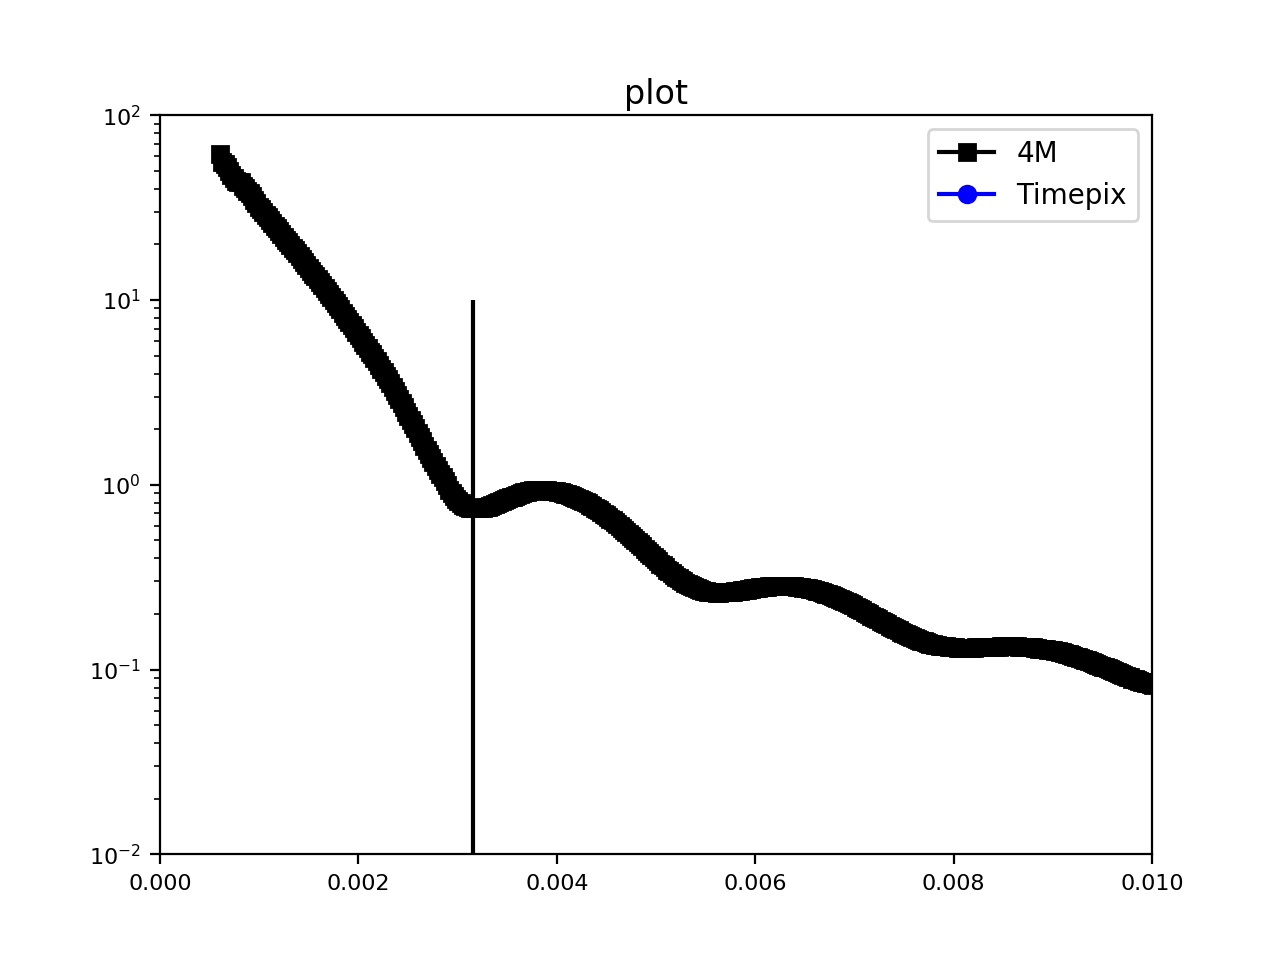

In [966]:
fig, ax = plt.subplots()
plot1D( x= extract_dict['q_saxs'], y= extract_dict[ 'iq_saxs' ], ax =ax, legend='4M', m='s',c='k' )
plot1D( x=q_saxs, y= iq_saxs * 100, ax =ax, legend='Timepix', m='o',c='b', logy=True, xlim=[0., 0.01], ylim=[0.01,100] )
ax.vlines( 0.00316, 0.,10 )


In [967]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/xpcs_timepixel.py

In [1029]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/xpcs_timepixel.py

# Get interested time region

In [1130]:
thres = 2000
wimgsum= np.where( imgsum0 > thres )[0]
wtimes = times0[wimgsum]
#t1,t2= times0[ w[0][0] ], times0[ w[0][-1] ]
print(len(wtimes),wtimes)




135453 [  7.99000000e-01   8.00000000e-01   8.01000000e-01 ...,   9.45679000e+02
   9.45680000e+02   9.45681000e+02]


In [1263]:
ww = np.where( np.diff( wtimes ) >  1)[0]
wt = np.zeros( [   len(ww) +1, 2]  )
wt[0] = [times0[798], times0[wimgsum][ww][0]]
wt[1:-1,0] =  times0[wimgsum][ww+1][:-1]
wt[1:-1,1] =    times0[wimgsum][ww][1:]
wt[-1] =  [ times0[wimgsum][ww+1][-1], times0[wimgsum][ww+1][-1] +3]
#print( wt )

In [441]:
%run ~/chxanalys_link/chxanalys/chx_generic_functions.py

In [1264]:
posi = 6
posi = 20
 
uid='run20_pos%s'%posi
print(uid)

tw1, tw2 = wt[posi] 

print(tw1,tw2)

run20_pos20
339.035 341.286


 #find_index(t[:w2],83)

t[42522611], t[42522611+8178938]

 find_index(t[42522611:w2],86.8)

339034 341285
339.035 341.286


<IPython.core.display.Javascript object>


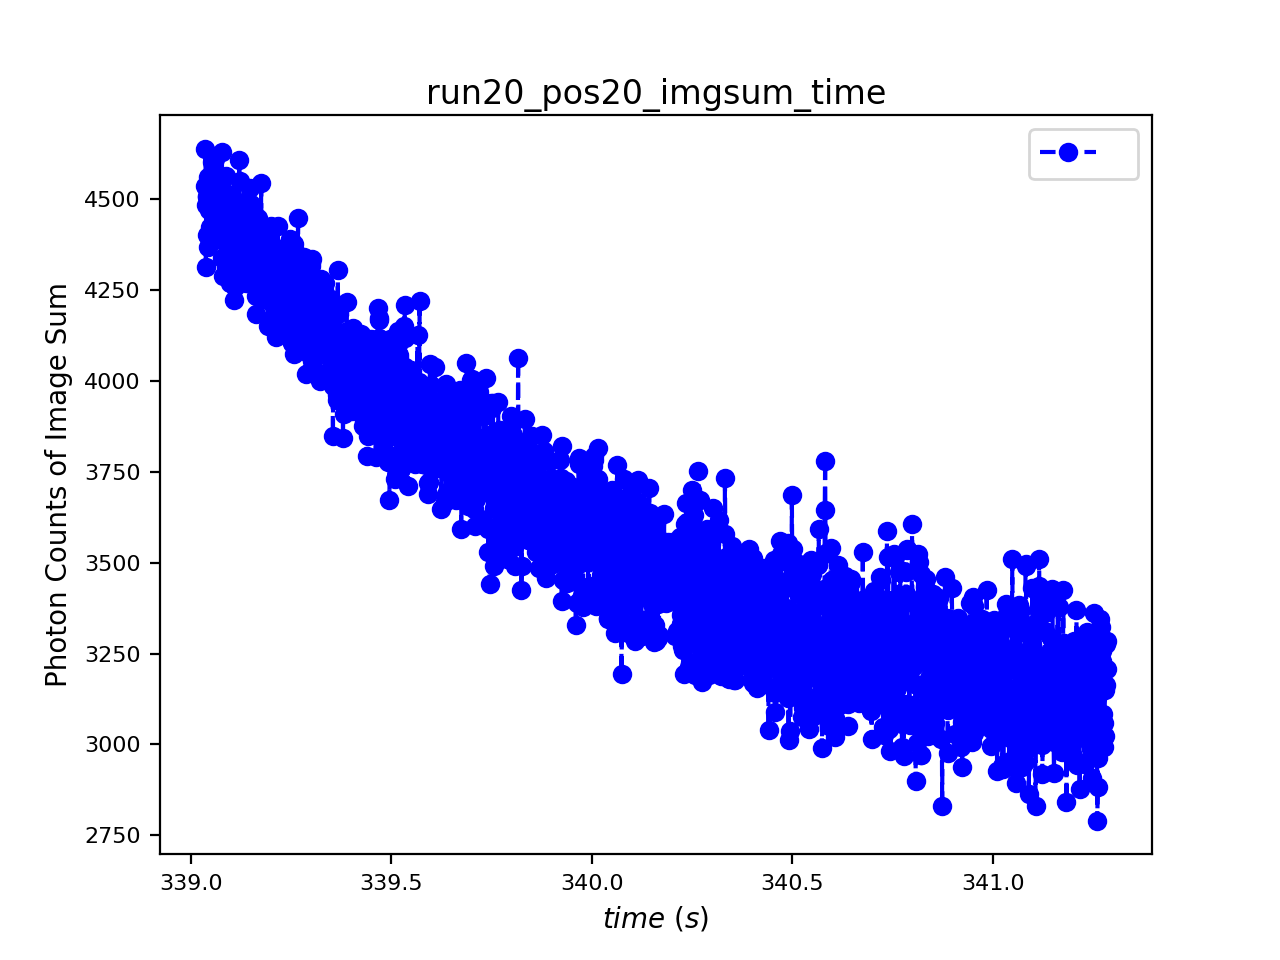

In [1268]:
#k1,k2= 0,30000
tk1,tk2=  np.argmin(np.abs(times0-tw1)),np.argmin(np.abs(times0-tw2)) 
print(tk1,tk2)
print(times0[tk1], times0[tk2])

plot1D( x = times0[tk1:tk2], y= imgsum0[tk1:tk2] , m='o', c='b', ls = '--',save=True, path= out_dir,
     title='%s_imgsum_time'%uid, xlabel = r"$time $ $(s)$", ylabel = 'Photon Counts of Image Sum' ) 

#t1 = 0.8  + 17 * (posi-1)
#t2 =  3.23  + 17 * (posi-1)
#print(t1,t2)

In [1251]:
%run ~/chxanalys_link/chxanalys/chx_generic_functions.py

In [1269]:
t1_ind, t2_ind =  np.argmin(np.abs(t-tw1)),np.argmin(np.abs(t-tw2))
#print(t1_ind, t2_ind)
print(tw1, tw2)
print(t[t1_ind], t[t2_ind])

339.035 341.286
339.035000014 341.286000502


In [1270]:
print('The effective time is %s s'%(   t[t2_ind] - t[t1_ind] ))

The effective time is 2.2510004875 s


# Start Analysizing here

In [1271]:
xeff = x[t1_ind:t2_ind] 
yeff = y[t1_ind:t2_ind] 
poseff = xeff * 256 + yeff
t0eff =tt0[t1_ind:t2_ind] - tt0[t1_ind]
teff = t0eff * time_unit

(2250,)
0.001


<IPython.core.display.Javascript object>


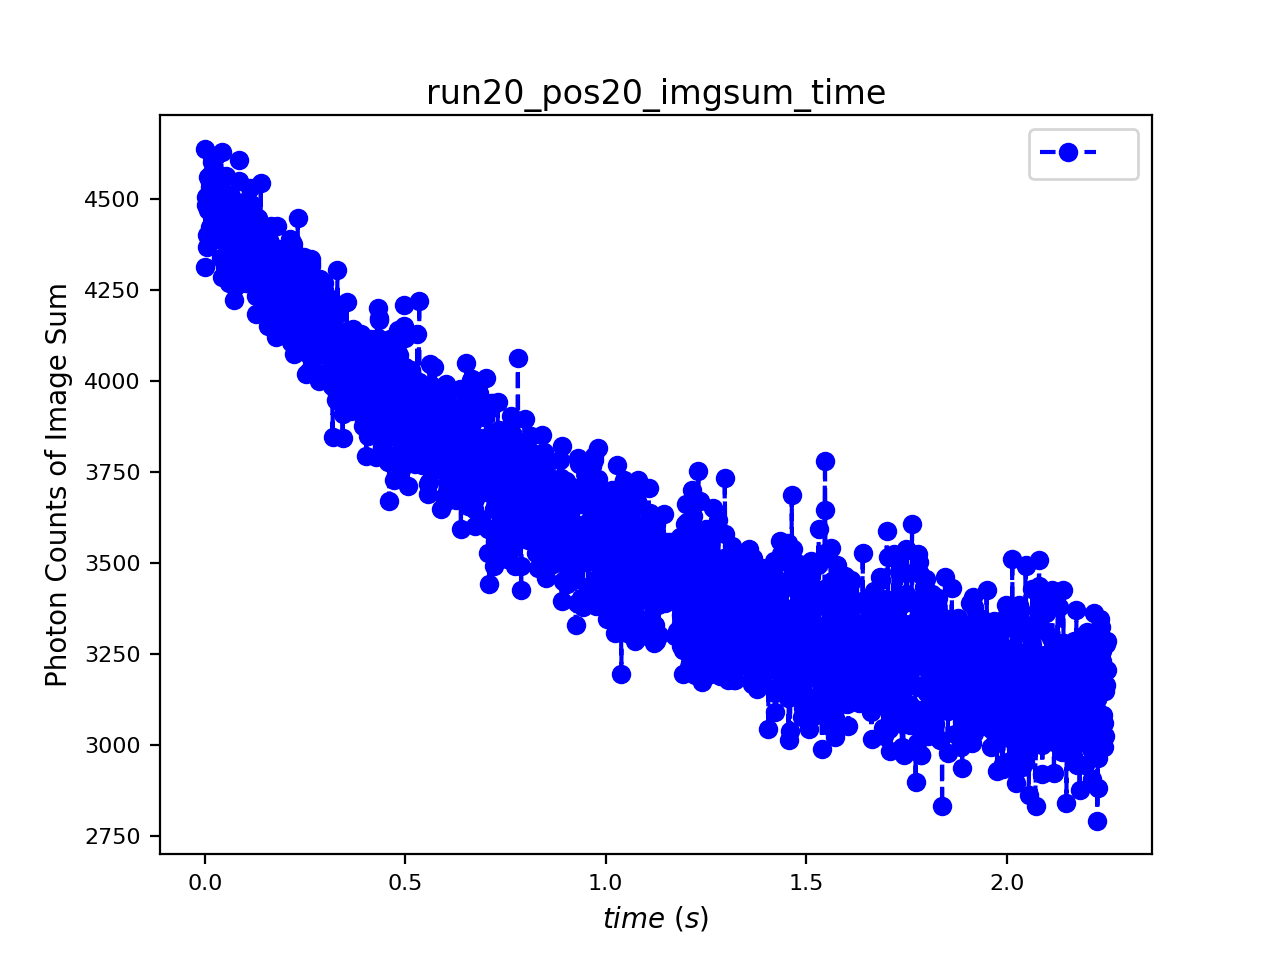

In [1272]:
tbin_step = 0.001 * 1  #in unit of s
times, imgsum = get_his_taus( teff, bin_step = tbin_step )
#times in ms
print(times.shape) 
timeperframe =  tbin_step 
print ( timeperframe)

plot1D( x = times, y= imgsum , m='o', c='b', ls = '--',save=True, path= out_dir,
     title='%s_imgsum_time'%uid, xlabel = r"$time $ $(s)$", ylabel = 'Photon Counts of Image Sum' ) 

# Compress Data

In [1286]:
xeff,yeff,t0eff

(array([115, 179, 109, ...,  97, 109, 218]),
 array([ 32,  47, 125, ...,  88, 107,  44]),
 array([           0,        24320,        35840, ..., 368803502336,
        368803644416, 368803703040], dtype=int64))

In [1287]:
center

array([ 280.,  256.])

In [1288]:
out_dir

'/home/yuzhang/Analysis/Timepix/2017_3/Results/run20/'

In [1289]:
tbins = 0.01 #10 ms
tbins = 0.001 #1 ms
tbins = 0.0001 #0.1 ms
tbins = 0.00001  #0.01 ms
tbins = 0.000001  #0.001 ms, 1 microsecond

tbins = 0.00001  #10 us
tbins = 0.000005  #5 us

tbins = 0.0000075  #7.5 us
tbins = 0.00001  #10 us
binstep = int(tbins/time_unit)
tinbs = binstep * time_unit
    
print(binstep, tinbs)




1638400 9.999999999999999e-06


In [1290]:
uid

'run20_pos20'

In [1291]:
filename = out_dir0 + uid + '_tbin=%s.cmp'%tbins
print(filename)

/home/yuzhang/Analysis/Timepix/2017_3/Results/run20_pos20_tbin=1e-05.cmp


In [1292]:
md = { 'detector_distance': 16035 + 0,
      'beam_center_x': 256,
      'beam_center_y': 280,
       'x_pixel_size': 0.045,
      'y_pixel_size': 0.0045,
      'incident_wavelength': 1.28481,
      'sx': 256,
      'sy':256,
     'frame_time': tbins, 
      'count_time': tbins,
       'uid': 'uid=Run%s'%run
     }

In [1293]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/xpcs_timepixel.py

In [1294]:
avg_img, imgsum, N = compress_timepix_data( poseff,
                                            t0eff,
                                       binstep, filename = filename, 
                                       md = md, force_compress= True  )

Create a new compress file with filename as :/home/yuzhang/Analysis/Timepix/2017_3/Results/run20_pos20_tbin=1e-05.cmp.
There are 225099 frames to be compressed...


100%|██████████| 225099/225099 [00:05<00:00, 39403.60it/s]


In [1295]:
FD = Multifile(filename, 0, N  )
uidstr_ = uidstr + 'tbins=%.3f_ms'%( tbins*1000 ) 

In [1296]:
good_start = 0
bad_frame_list =[]

<IPython.core.display.Javascript object>


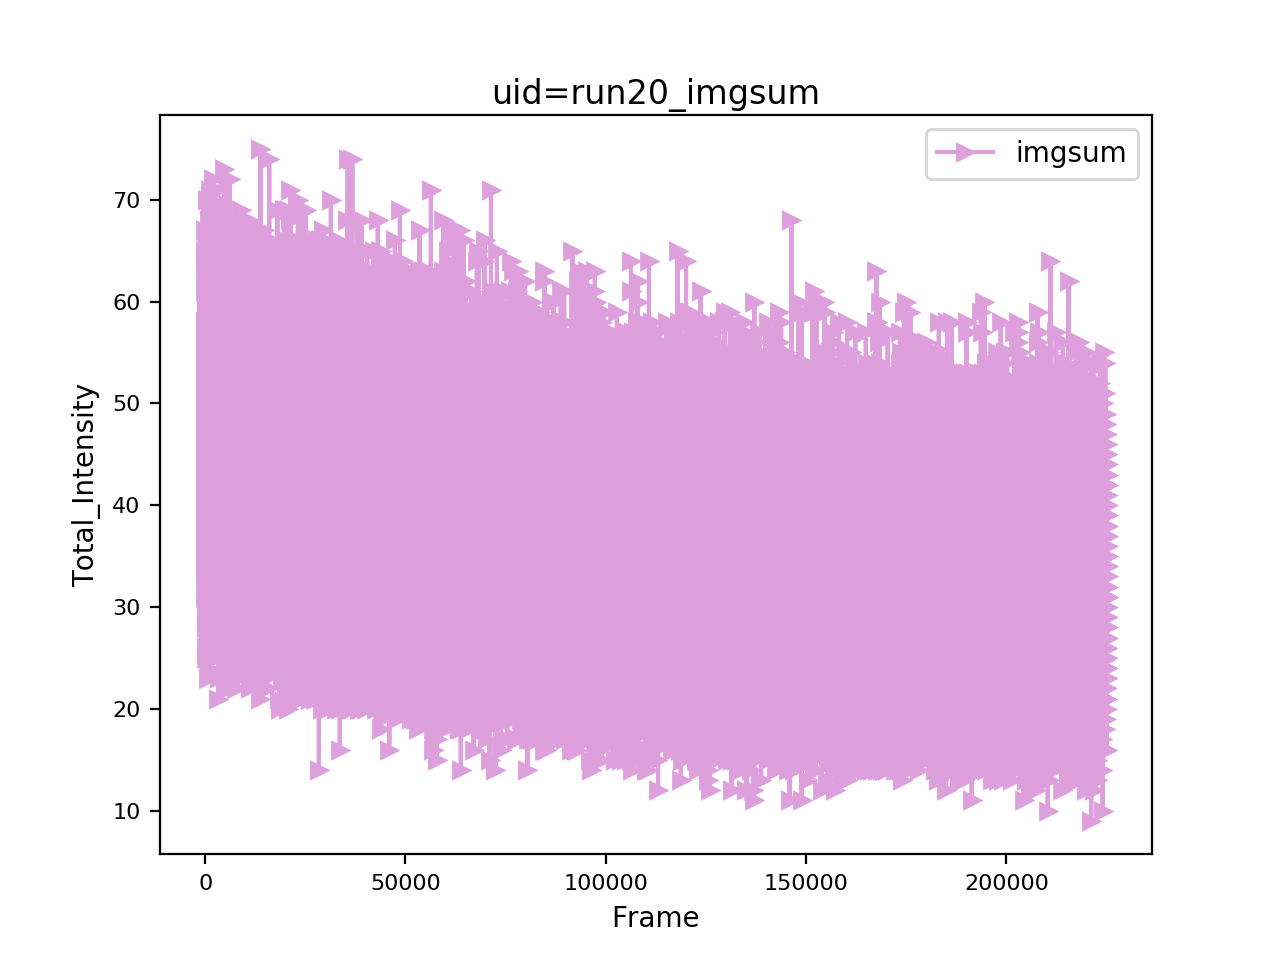

In [1297]:
plot1D( y = imgsum[ np.array( [i for i in np.arange(good_start, len(imgsum)) if i not in bad_frame_list])],
       title =uidstr + '_imgsum', xlabel='Frame', ylabel='Total_Intensity', legend='imgsum'   )
Nimg = N

<IPython.core.display.Javascript object>


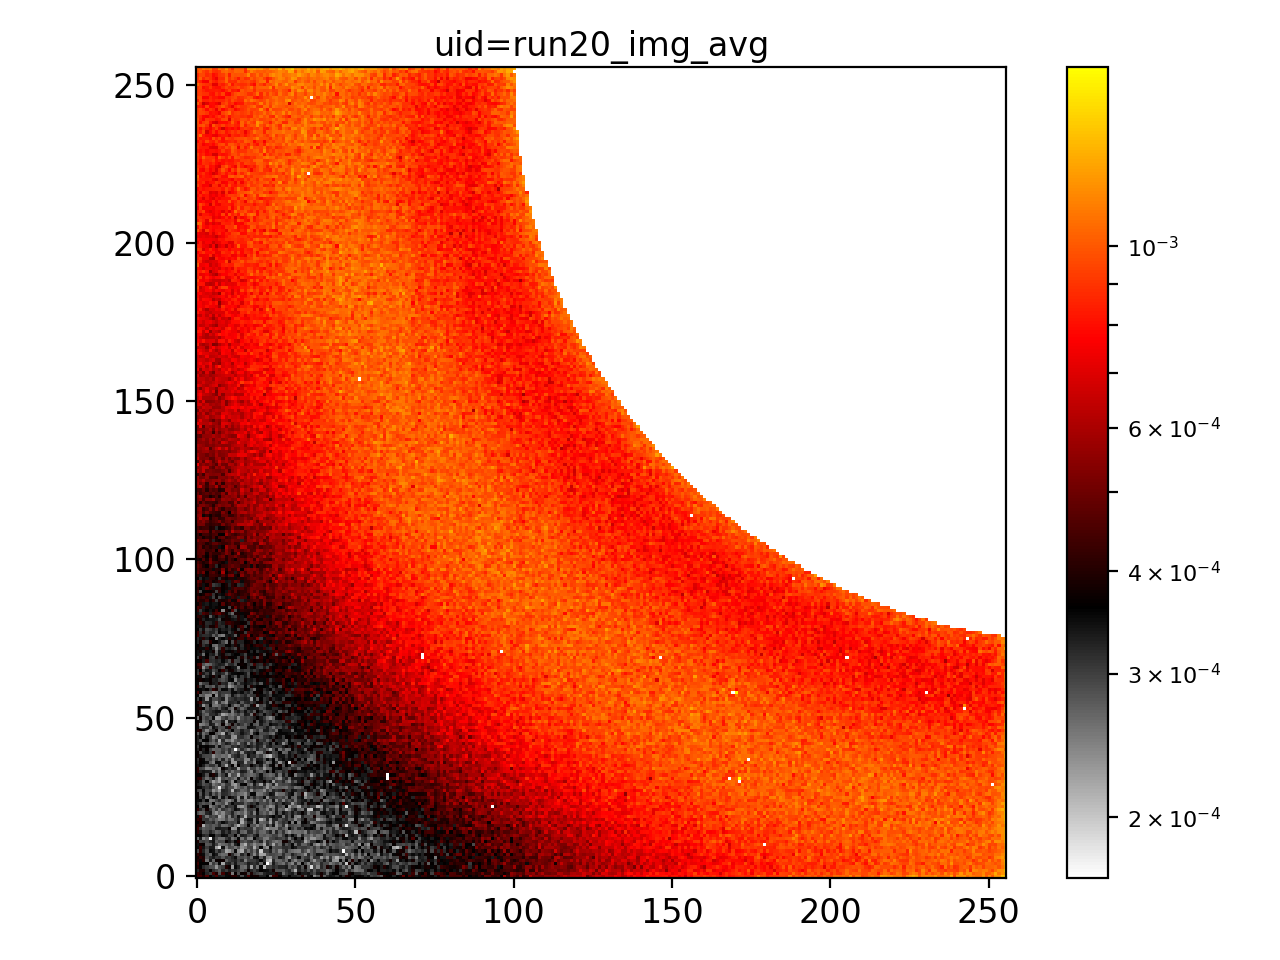

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [1298]:
show_img( avg_img,   vmin=None, vmax=None, logs=True, aspect=1, #save_format='tif',
         image_name= uidstr + '_img_avg',  save=True, path=out_dir,  cmap = cmap_albula, center=center[::-1] )

In [1299]:
#show_img( FD.rdframe( 99 ),vmin=.1, vmax= 1e1, logs= True, aspect=1, )

/opt/conda_envs/analysis/lib/python3.5/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/yuzhang/chxanalys_link/chxanalys/chx_generic_functions.py:1131: RankWarning: Polyfit may be poorly conditioned
  pol = np.polyfit(x, y, order)


<IPython.core.display.Javascript object>


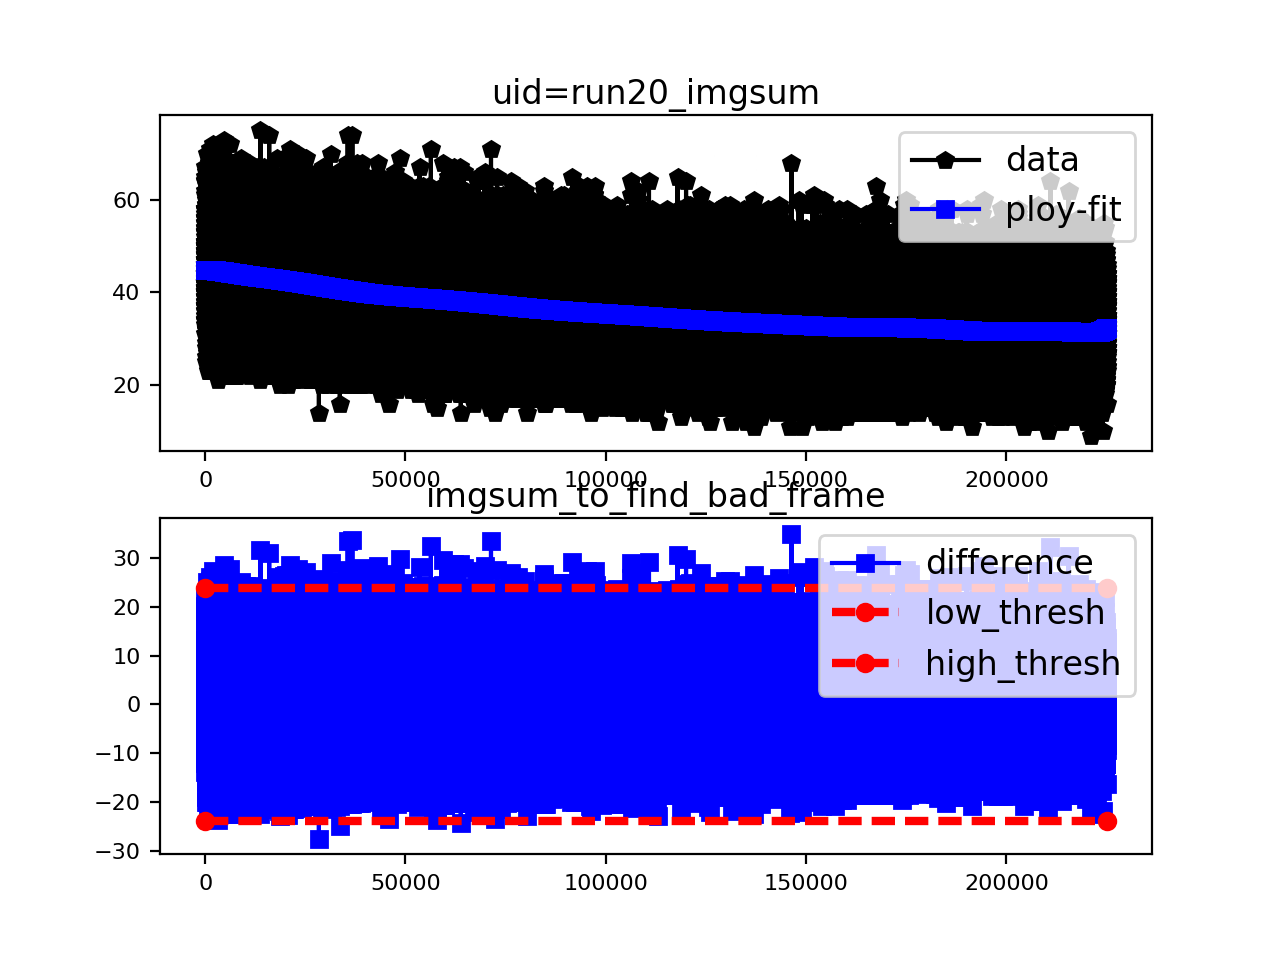

The bad frame list length is: 187


In [1300]:
bad_frame_list =  get_bad_frame_list( imgsum, fit='both',  plot=True,polyfit_order = 30,                                      
                        scale= 3.5,  good_start = good_start, good_end=Nimg, uid= uidstr, path=out_dir)
print( 'The bad frame list length is: %s'%len(bad_frame_list) )

In [1301]:
imgsum_y = imgsum[ np.array( [i for i in np.arange( len(imgsum)) if i not in bad_frame_list])]
imgsum_x = np.arange( len( imgsum_y))
save_lists(  [imgsum_x, imgsum_y], label=['Frame', 'Total_Intensity'],
           filename=uidstr + '_img_sum_t', path= data_dir  )

### Plot time~ total intensity of each frame

<IPython.core.display.Javascript object>


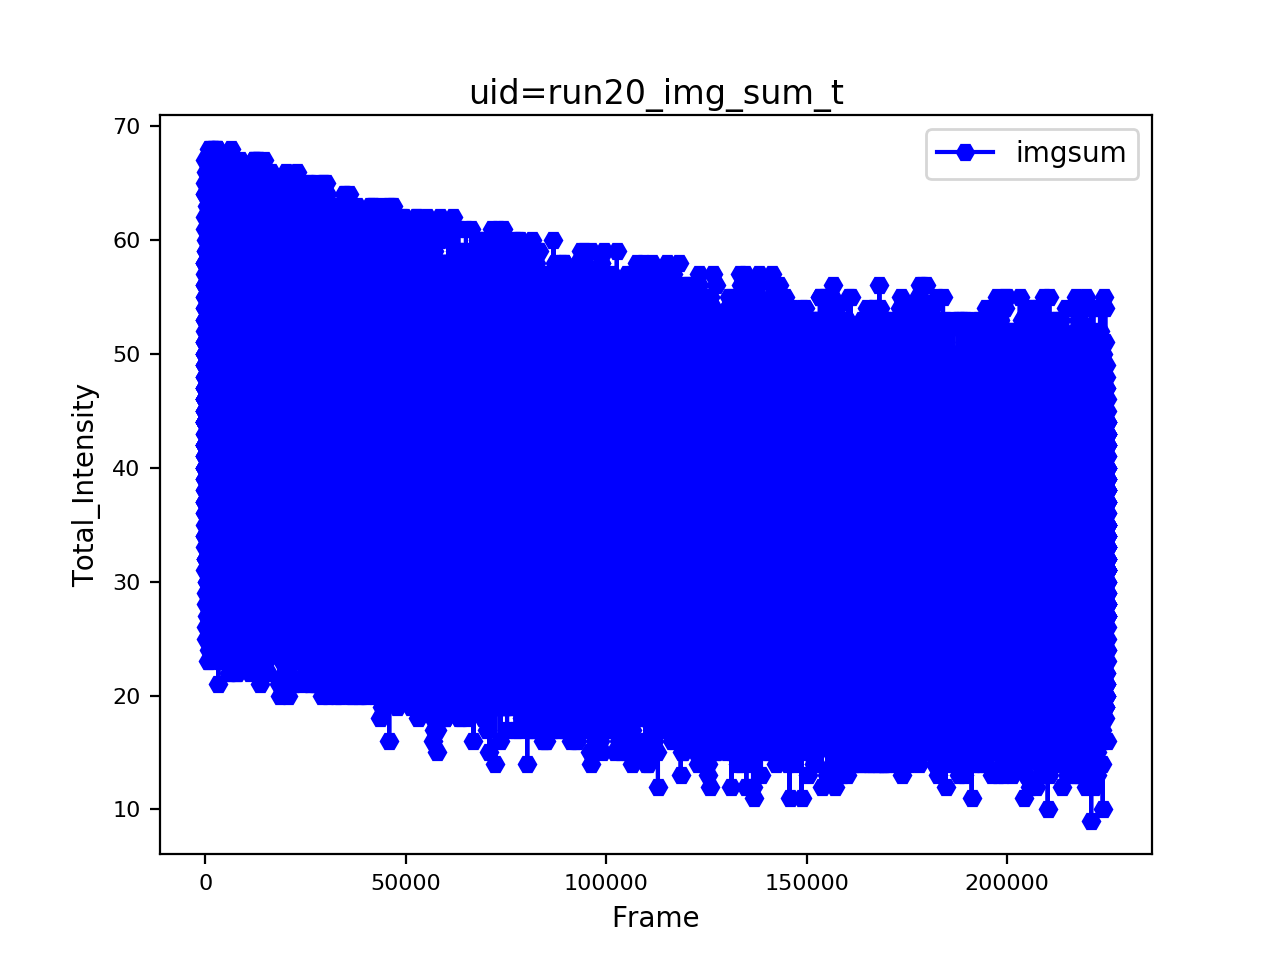

In [1302]:
plot1D( y = imgsum_y, title = uidstr + '_img_sum_t', xlabel='Frame', c='b',
       ylabel='Total_Intensity', legend='imgsum', save=True, path=out_dir)

In [1304]:
setup_pargs

{'Ldet': 16035,
 'center': [256, 280],
 'dpix': 0.046,
 'exposuretime': 0.001,
 'lambda_': 1.28481,
 'path': '/home/yuzhang/Analysis/Timepix/2017_3/Results/run20/',
 'uid': 'uid=run20'}

<IPython.core.display.Javascript object>


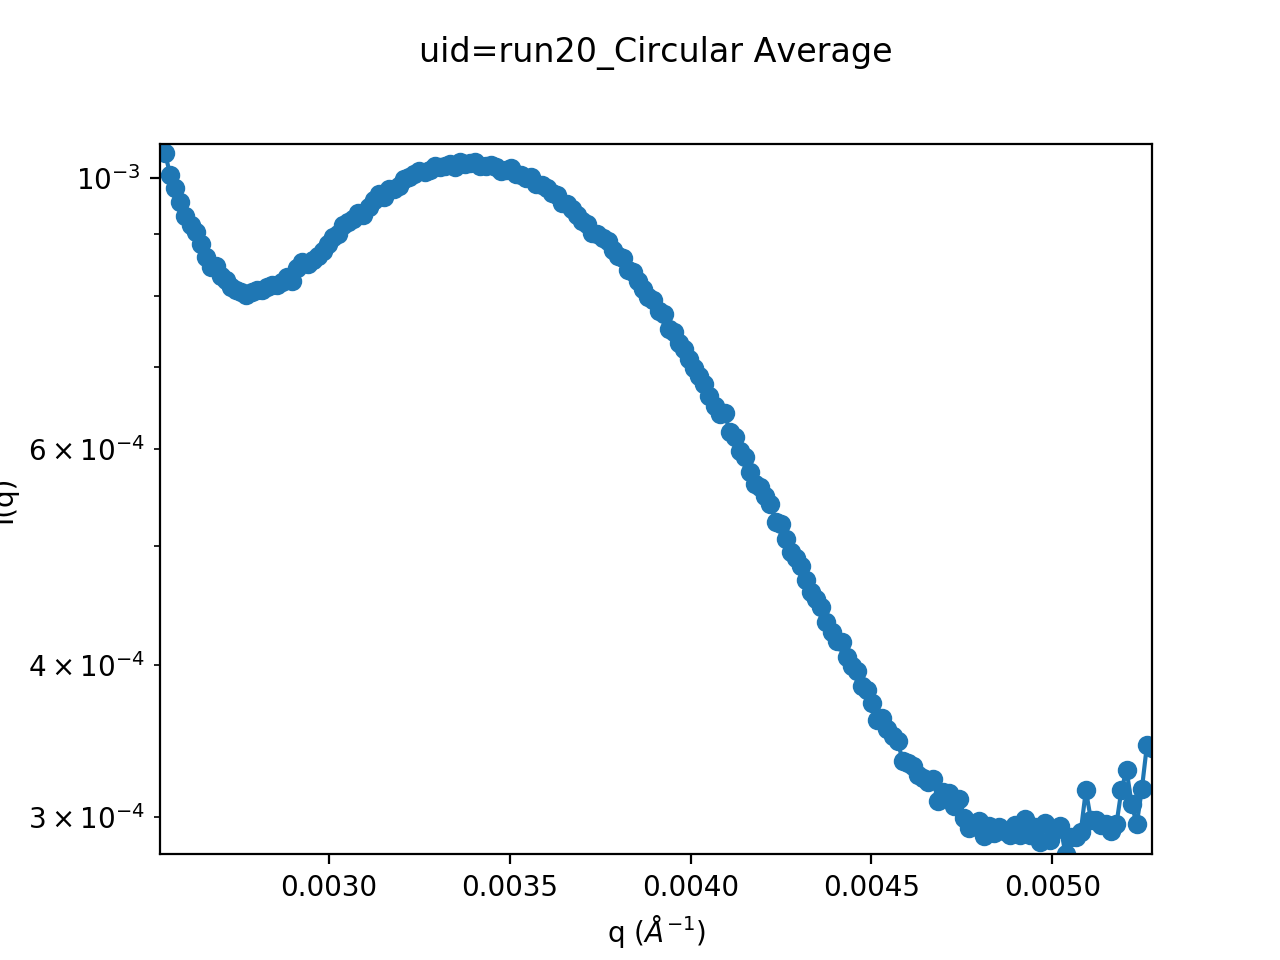

In [1305]:
if scat_geometry =='saxs':
    ## Get circular average| * Do plot and save q~iq
    #hmask = create_hot_pixel_mask( avg_img, threshold = 1e2, center=center, center_radius= 100)
    #mask = mask * hmask
    qp_saxs, iq_saxs, q_saxs = get_circular_average( avg_img, mask, pargs= setup_pargs  )
    plot_circular_average( qp_saxs, iq_saxs, q_saxs,  pargs=setup_pargs, 
                      xlim=[q_saxs.min(), q_saxs.max()*1.0], ylim = [iq_saxs.min(), iq_saxs.max()] )
#mask =np.array( mask * hmask, dtype=bool) 


# Create ring-shaped ROI

In [1306]:

if scat_geometry =='saxs':    
    uniformq =  True  #True # False    
    ## Define ROI
    #* Create ring mask defined by  inner_radius, outer_radius, width, num_rings (all in pixel unit)
    #* Create ring mask defined by  edges (all in pixel unit)    
    ### Define a non-uniform distributed rings by giving edges
    if not uniformq:
        
        qcenters = [  0.0023,  0.00365, 0.0050, ]#0.00621, 0.00754, 0.00880  ] #in A-1        
        #width = 0.0001  # in A-1         
        #width =    [0.0001,      0.00012,  0.00014,  0.00016, 0.00018,  0.0002,  0.00022 ]
        width =    np.array( [0.0001,      0.00012,  0.00014,  0.00016, 0.00018,  0.0002,  0.00022 ] ) * 3.5
        
        edges = get_non_uniform_edges(  qcenters, width, number_rings =1 )    
        inner_radius= None
        outer_radius = None
        width = None
        num_rings = None        
    # Define a uniform distributed rings by giving inner_radius, outer_radius, width, num_rings (all in pixel unit)
    if uniformq:            
        inner_radius= 0.0026 #0.006  #16
        outer_radius = 0.0050 #0.05  #112    
        num_rings = 12 #18
        gap_ring_number = 0.1
        width =    ( outer_radius - inner_radius)/(num_rings + gap_ring_number)
        edges = None





In [1307]:
if scat_geometry =='saxs':
    roi_mask, qr, qr_edge = get_ring_mask(  mask, inner_radius=inner_radius, 
            outer_radius = outer_radius , width = width, num_rings = num_rings, edges=edges,
                          unit='A',       pargs=setup_pargs   )
    qind, pixelist = roi.extract_label_indices(  roi_mask  ) 
    qr = np.round( qr, 5)
    print(len(qr))
    
    #show_ROI_on_image( avg_img, roi_mask, center, label_on = False, rwidth = 140, alpha=.9,  
    #                 save=True, path=out_dir, uid=uidstr, vmin= np.min(avg_img), vmax= np.max(avg_img),
    #                 aspect=1) 
    qval_dict = get_qval_dict( np.round(qr, 5)  )

12


In [1308]:
cpk.dump([roi_mask,qval_dict], open(out_dir + 'ring_roi_2017_nov24.pkl','wb') )

In [1309]:
#show_img(roi_mask * mask)

<IPython.core.display.Javascript object>


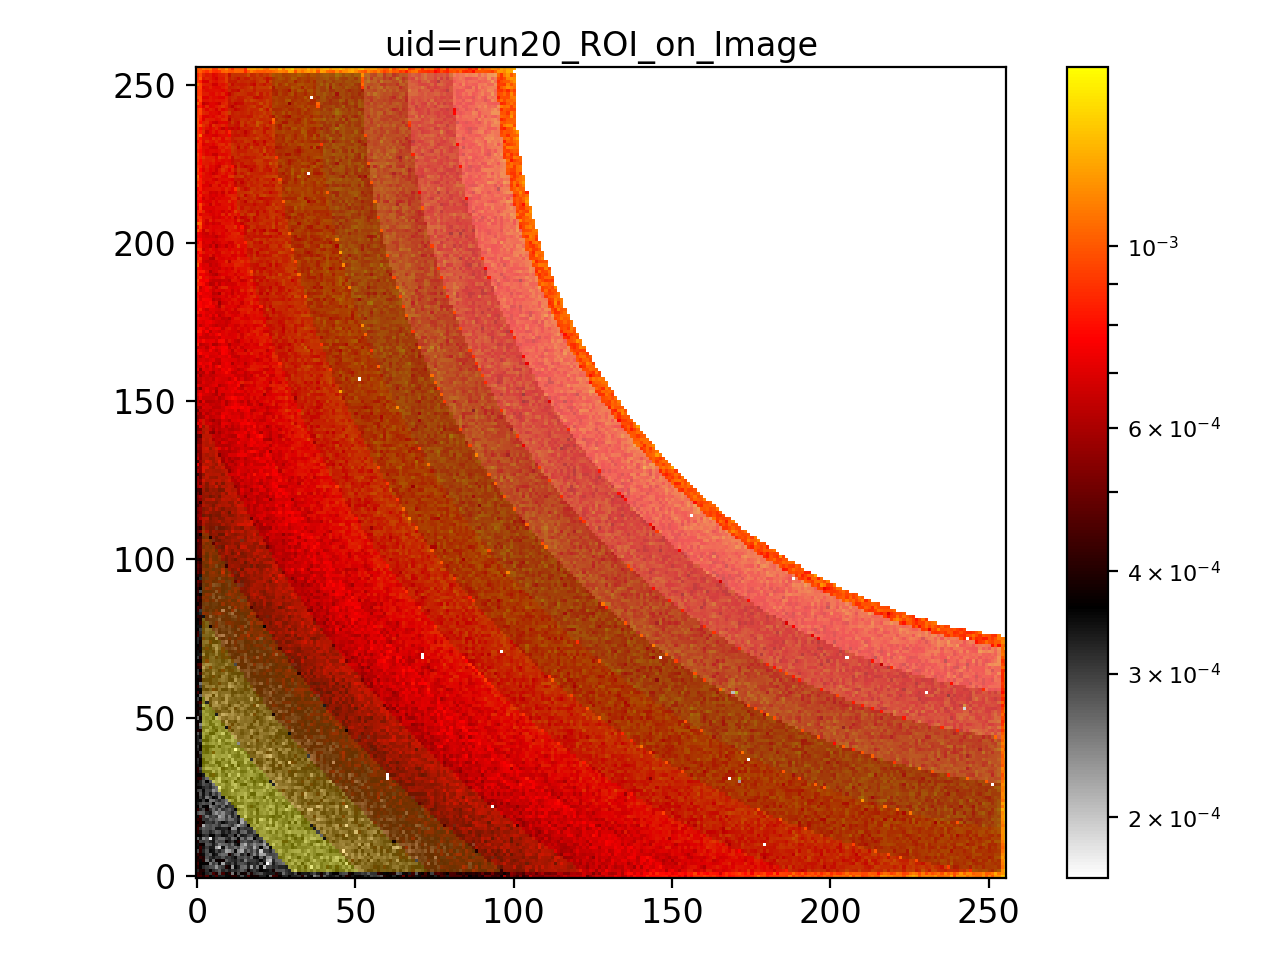

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [1310]:
show_img( avg_img, label_array = roi_mask, alpha=0.4, vmin=None, vmax= None, logs=True, aspect=1, center= center[::-1],           
         image_name= '%s_ROI_on_Image'%uidstr,  save=True, path= out_dir,  cmap = cmap_albula )

In [1311]:
setup_pargs 

{'Ldet': 16035,
 'center': [256, 280],
 'dpix': 0.046,
 'exposuretime': 0.001,
 'lambda_': 1.28481,
 'path': '/home/yuzhang/Analysis/Timepix/2017_3/Results/run20/',
 'uid': 'uid=run20'}

<IPython.core.display.Javascript object>


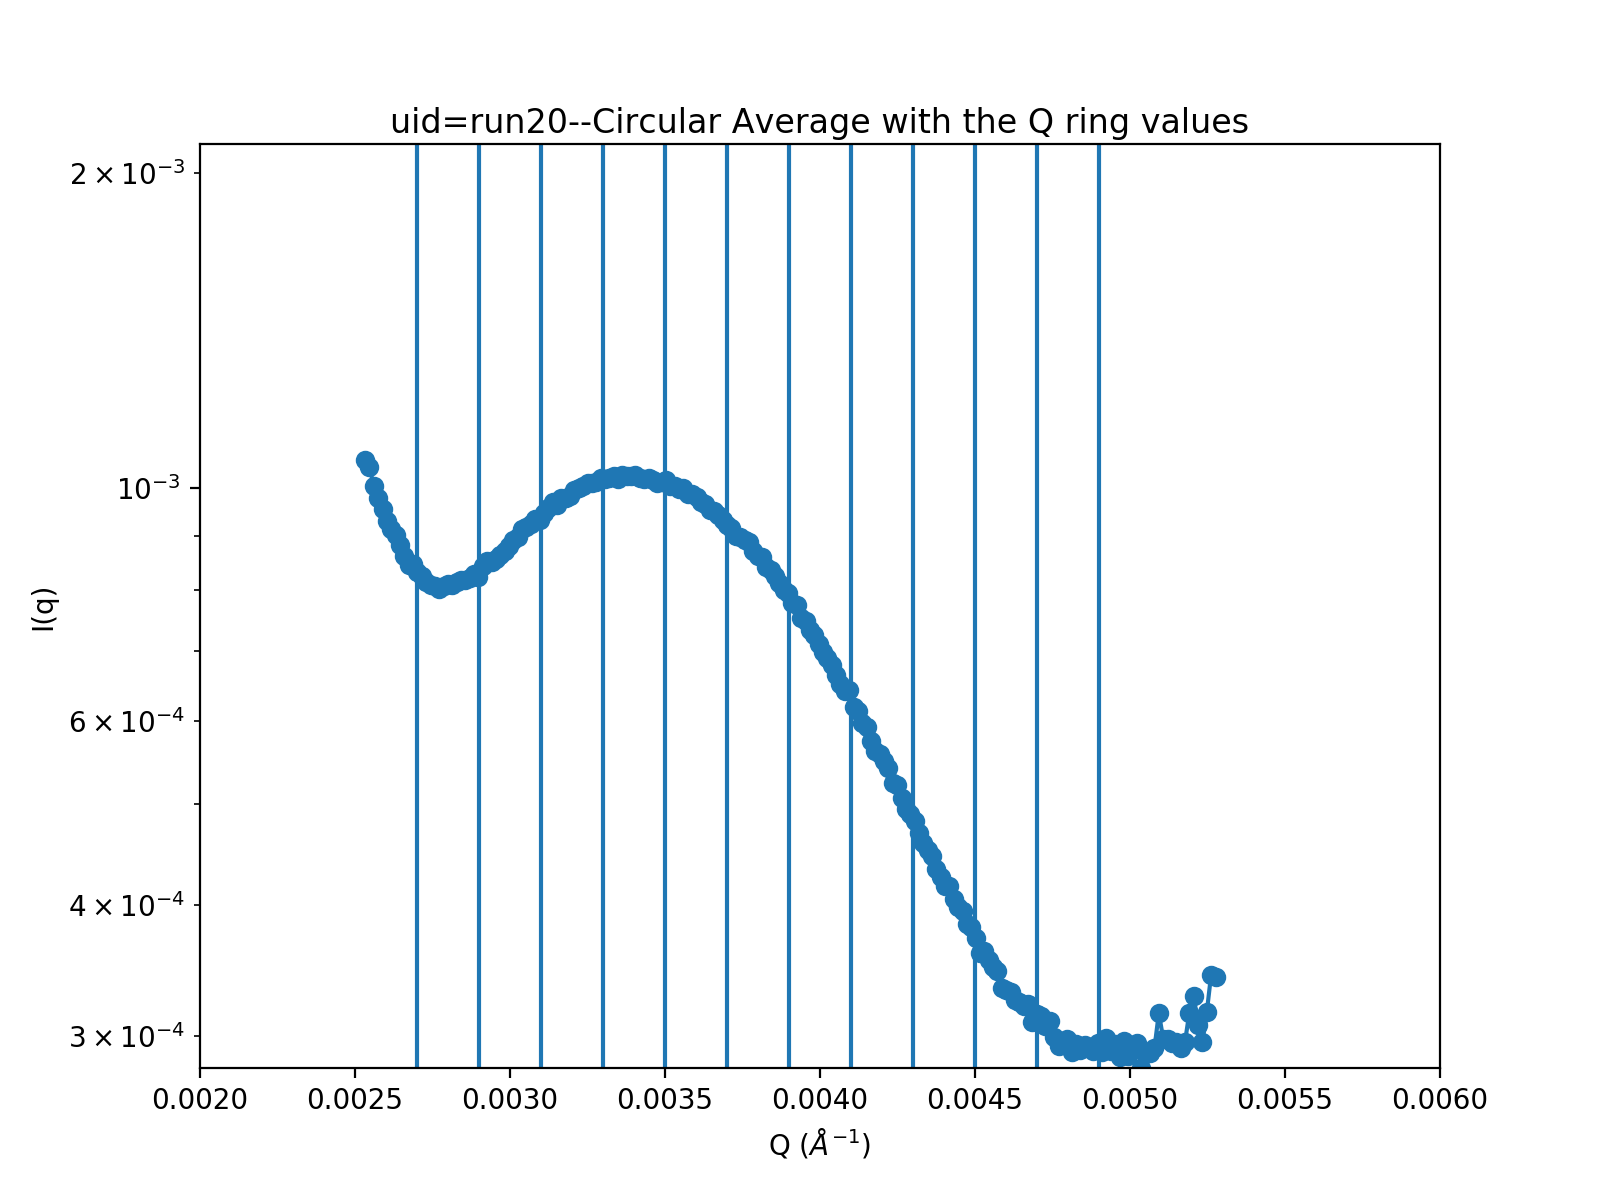

In [1312]:
if scat_geometry =='saxs':
    plot_qIq_with_ROI( q_saxs, iq_saxs, qr, logs=True, uid=uidstr, xlim=[0.002,0.006],
                  ylim = [iq_saxs.min(), iq_saxs.max()*2],  save=True, path= out_dir)

# Time Depedent I(q) Analysis

<IPython.core.display.Javascript object>


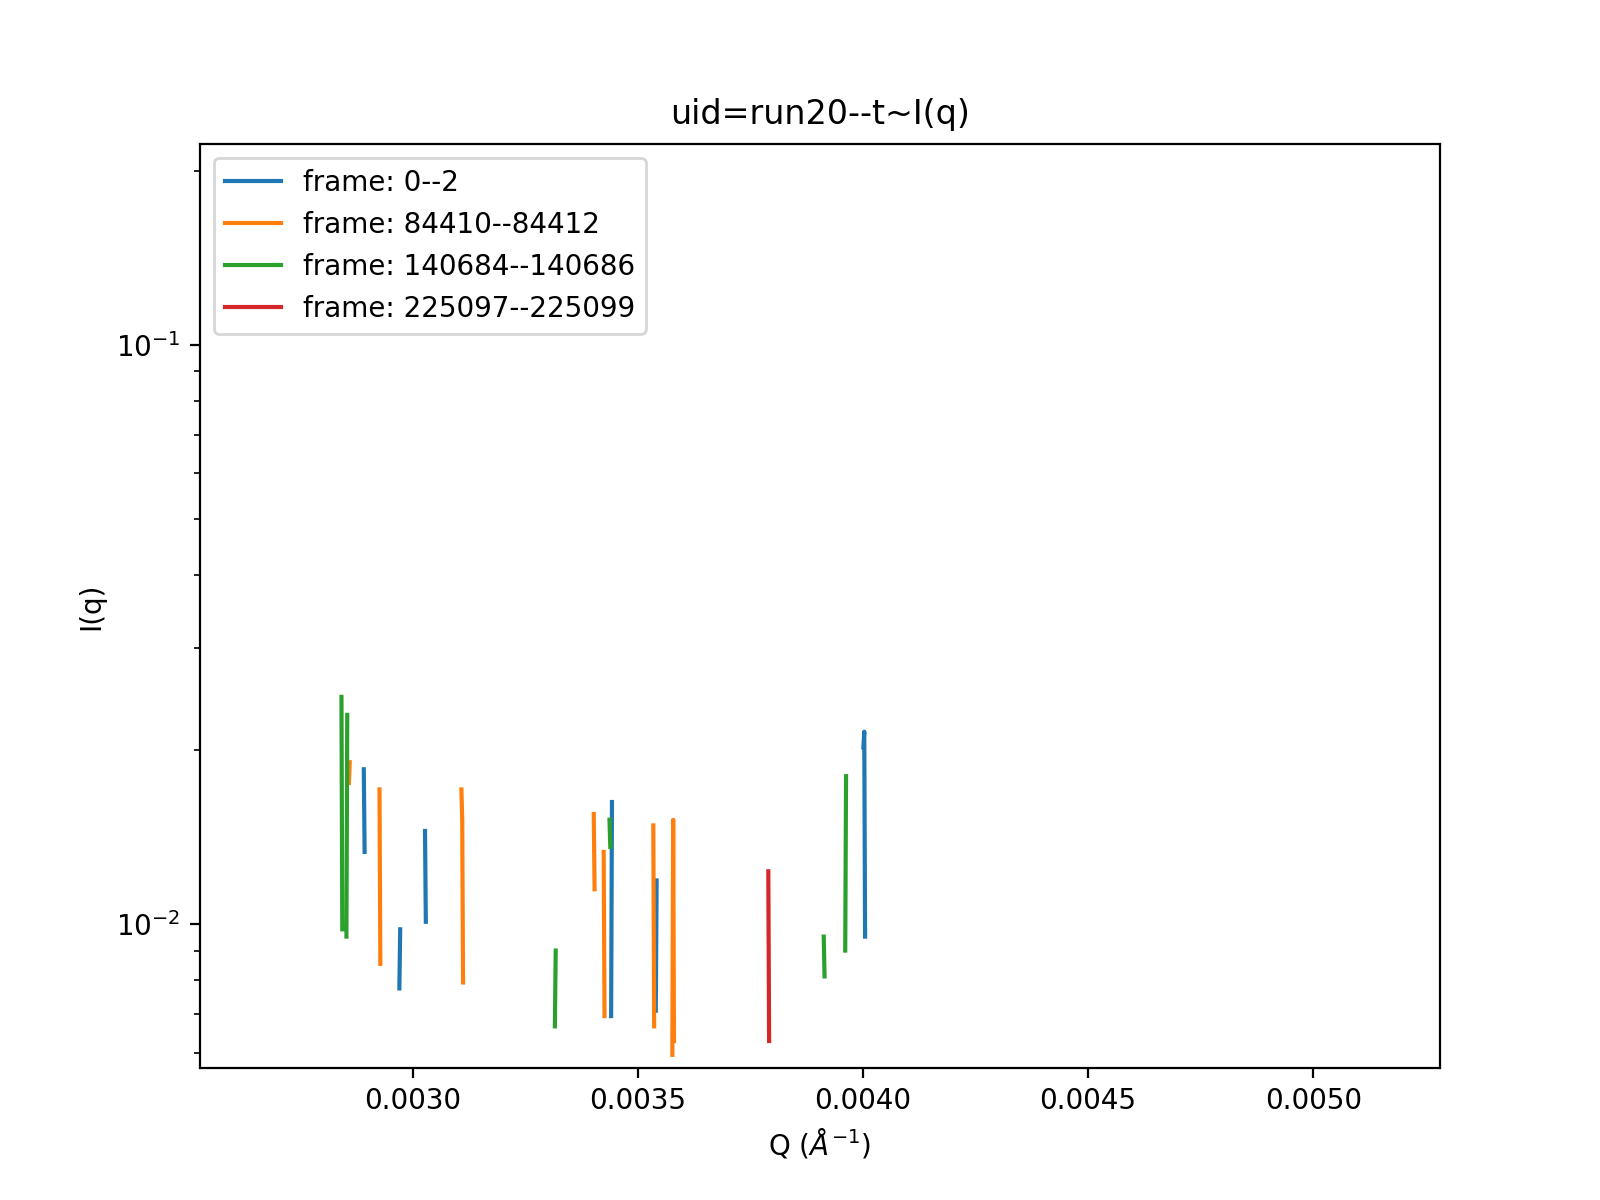

The file: uid=run20_q_Iqt is saved in /home/yuzhang/Analysis/Timepix/2017_3/Results/run20/


In [1313]:
if scat_geometry =='saxs':
    Nimg = FD.end - FD.beg 
    time_edge = create_time_slice( Nimg, slice_num= 4, slice_width= 2, edges = None )
    time_edge =  np.array( time_edge ) #+  good_start
    #print( time_edge )    
    qpt, iqst, qt = get_t_iqc( FD, time_edge, mask, pargs=setup_pargs, nx=1500, show_progress= False )
    plot_t_iqc( qt, iqst, time_edge, pargs=setup_pargs, xlim=[qt.min(), qt.max()],
           ylim = [iqst.min(), iqst.max()], save=True )

# Check one ROI intensity

<IPython.core.display.Javascript object>


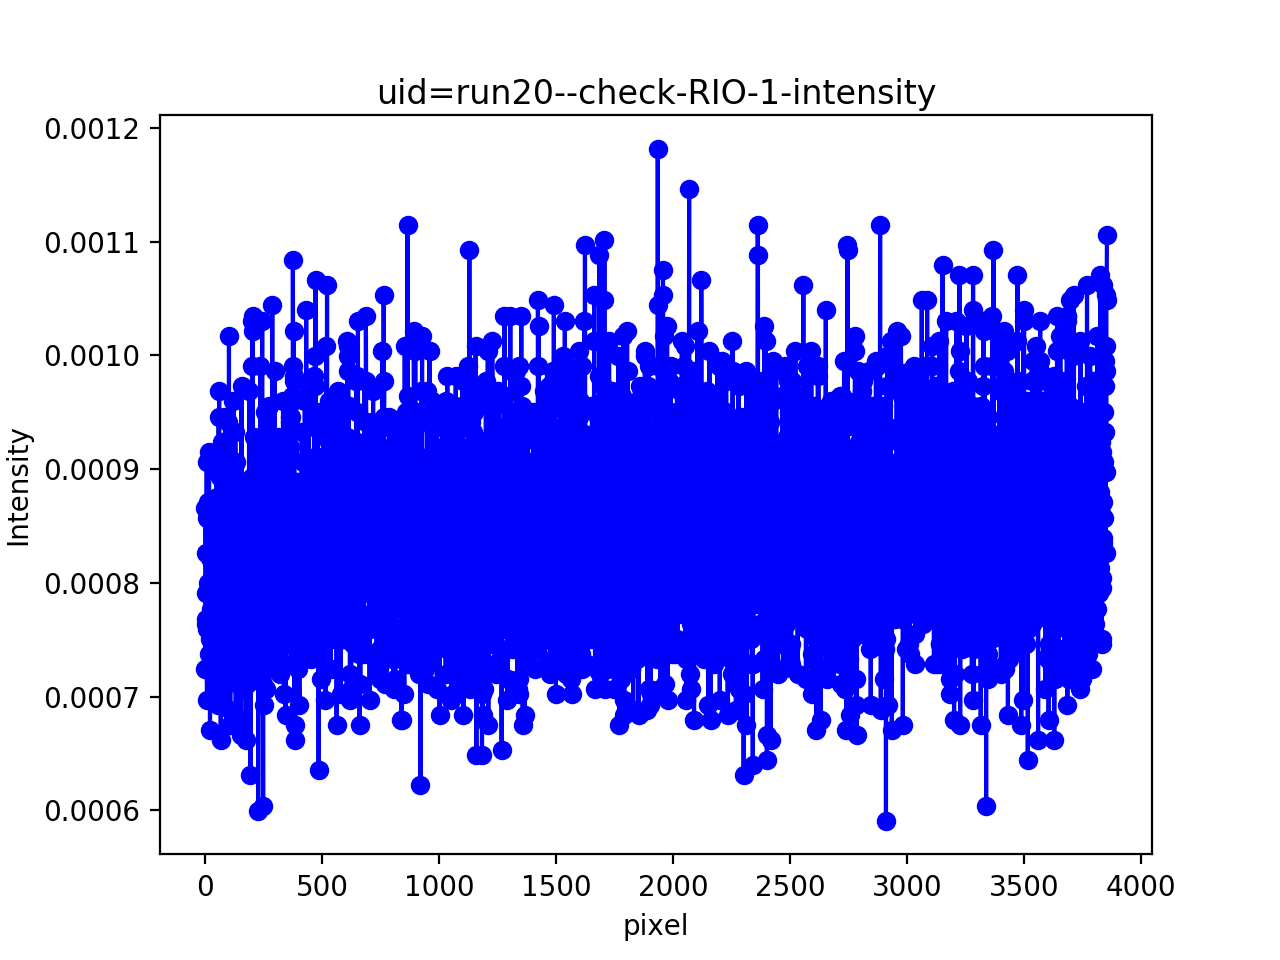

In [1314]:
roi_inten = check_ROI_intensity( avg_img, roi_mask, ring_number= 1, uid =uidstr ) #roi starting from 1

# Do a waterfall analysis

  0%|          | 0/12 [00:00<?, ?it/s]

Starting assign the tasks...
Starting running the tasks...


100%|██████████| 12/12 [00:18<00:00,  1.55s/it]

ROI mean_intensit calculation is DONE!


<IPython.core.display.Javascript object>


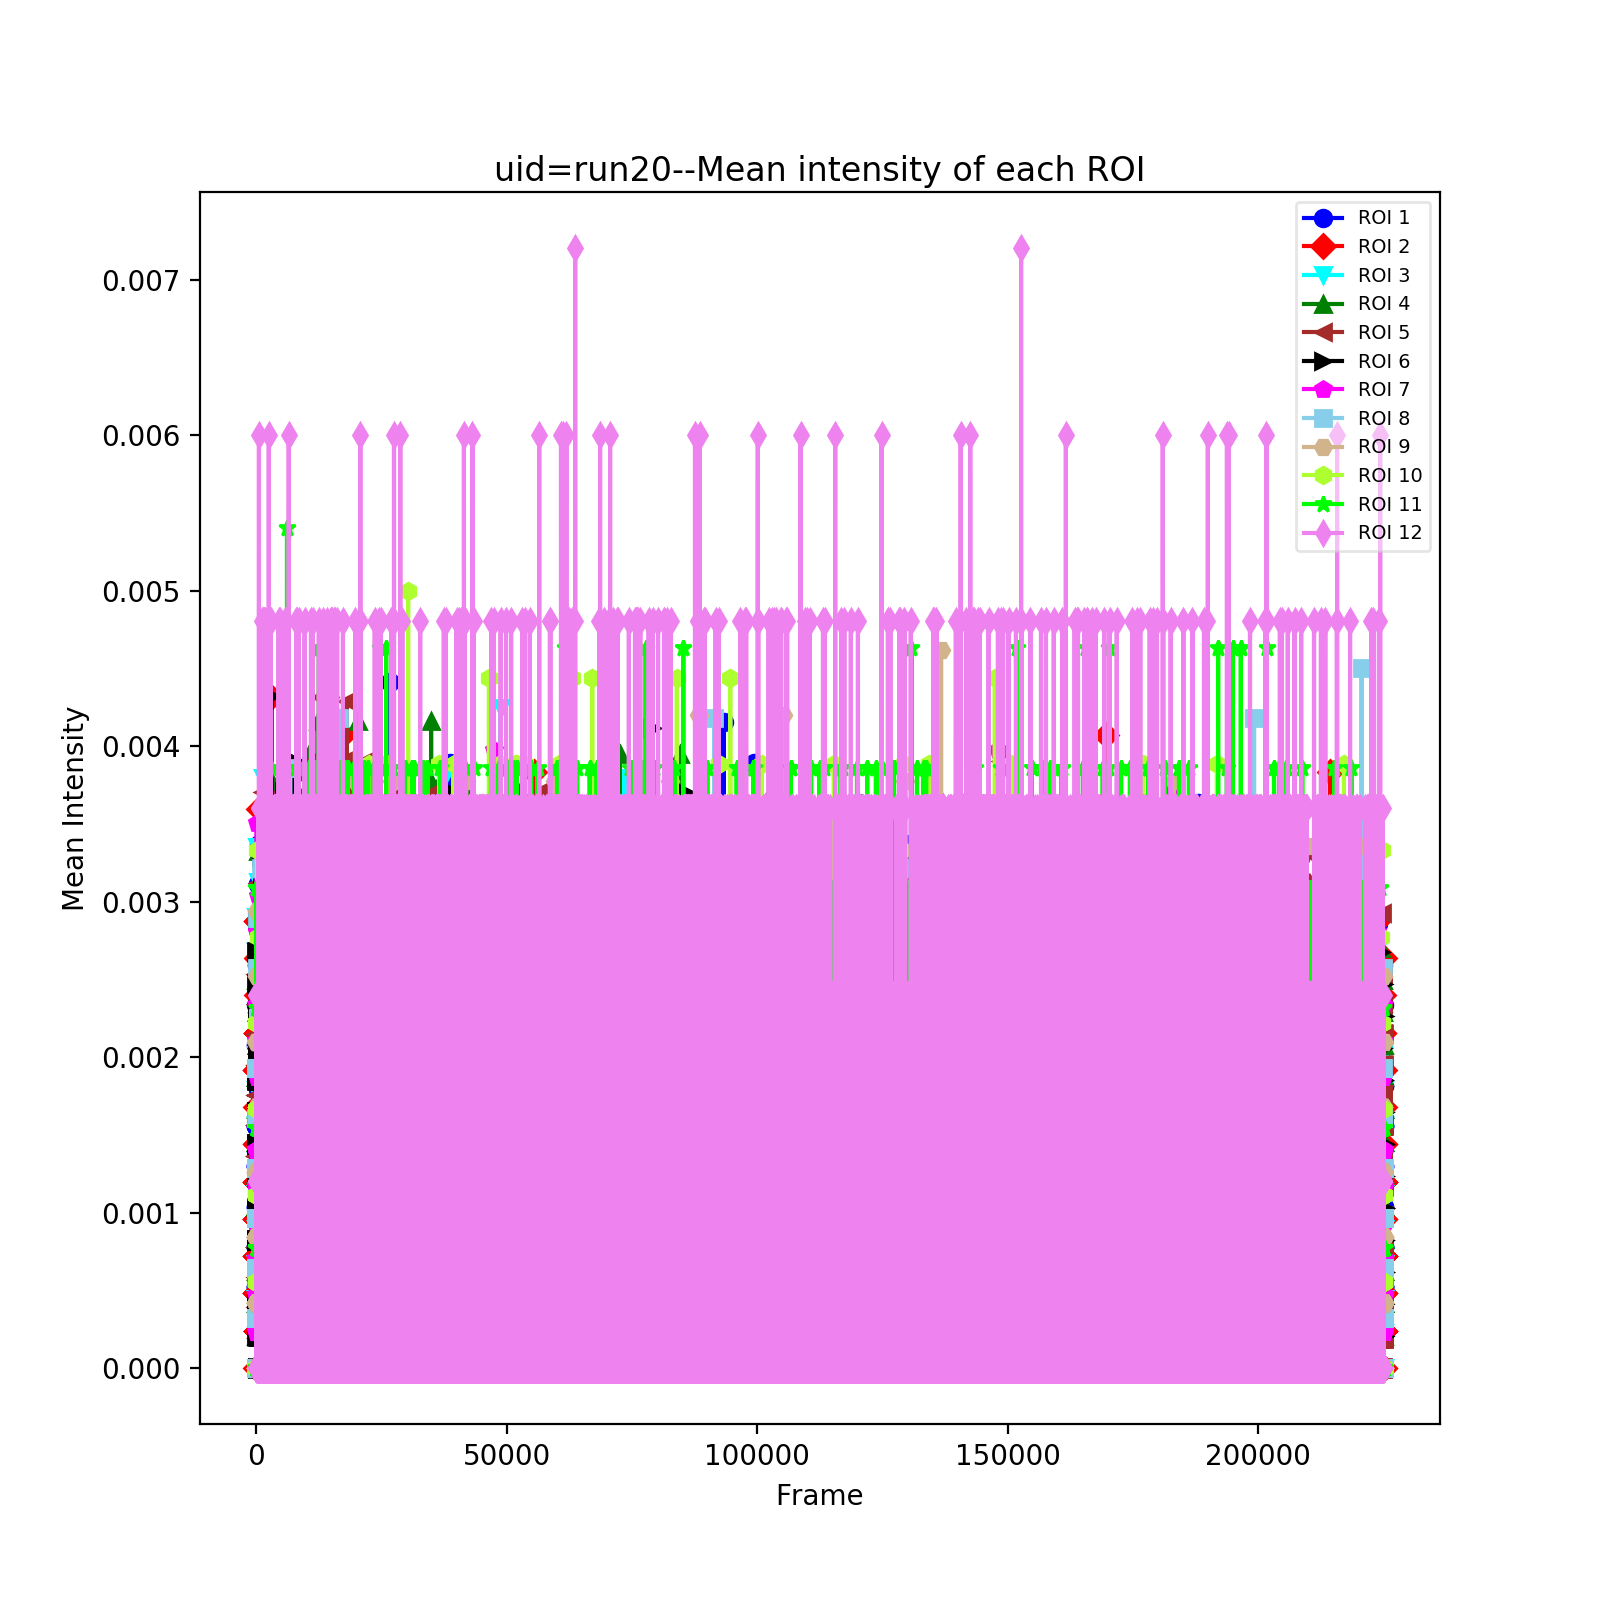

The file: uid=run20_t_ROIs is saved in /home/yuzhang/Analysis/Timepix/2017_3/Results/run20/


In [1315]:


ring_avg = None    
if run_t_ROI_Inten:
    times_roi, mean_int_sets = cal_each_ring_mean_intensityc(FD, roi_mask, timeperframe = None, multi_cor=True  ) 
    plot_each_ring_mean_intensityc( times_roi, mean_int_sets,  uid = uidstr, save=True, path= out_dir )
    roi_avg = np.average( mean_int_sets, axis=0)

In [1316]:
qind, pixelist = roi.extract_label_indices(roi_mask)
noqs = len(np.unique(qind))

In [1317]:
nopr = np.bincount(qind, minlength=(noqs+1))[1:]
nopr

array([3854, 4173, 4478, 4808, 5127, 4860, 4279, 3111, 2383, 1802, 1296,
        833])

# Do one time

In [1318]:
if use_sqnorm:norm = get_pixelist_interp_iq( qp_saxs, iq_saxs, roi_mask, center)
else:norm=None 
if use_imgsum_norm:imgsum_ = imgsum
else:imgsum_ = None    
import time

In [1319]:
if run_one_time: 
    t0 = time.time()    
    g2, lag_steps  = cal_g2p( FD,  roi_mask, bad_frame_list,good_start, num_buf = 8, num_lev= None,
                            imgsum= imgsum_, norm=norm )
    run_time(t0)

In this g2 calculation, the buf and lev number are: 8--16--
187 Bad frames involved and will be discarded!
224912 frames will be processed...


  0%|          | 0/12 [00:00<?, ?it/s]

Starting assign the tasks...
Starting running the tasks...


100%|██████████| 12/12 [05:47<00:00, 28.94s/it]

G2 calculation DONE!
Total time: 6.393 min


In [1320]:
lag_steps = lag_steps[:g2.shape[0]]
#uidstr_ = uidstr + 'tbins=%.3f_ms'%( tbins*1000 ) 
uid_ = uidstr + '_fra_%s_%s_tbins=%.3f_ms'%(FD.beg, FD.end,  tbins*1000 )
timeperframe  = tbins
print(uid_)

uid=run20_fra_0_225099_tbins=0.010_ms


In [1321]:
if run_one_time:
    
    taus = lag_steps * timeperframe    
    try:
        g2_pds = save_g2_general( g2, taus=taus,qr= np.array( list( qval_dict.values() ) )[:,0],
                                            qz = np.array( list( qval_dict.values() ) )[:,1],
                             uid=uid_+'_g2.csv', path= out_dir, return_res=True )
    except:
        g2_pds = save_g2_general( g2, taus=taus,qr= np.array( list( qval_dict.values() ) )[:,0],                                             
                             uid=uid_+'_g2.csv', path= out_dir, return_res=True )

The correlation function is saved in /home/yuzhang/Analysis/Timepix/2017_3/Results/run20/ with filename as uid=run20_fra_0_225099_tbins=0.010_ms_g2.csv


In [1322]:
if run_one_time:
    g2_fit_result, taus_fit, g2_fit = get_g2_fit_general( g2,  taus, 
                function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
            fit_variables={'baseline':True, 'beta': True, 'alpha':False,'relaxation_rate':True},                                  
            guess_values={'baseline':1.0,'beta': 0.12,'alpha':1.0,'relaxation_rate':0.0100,},
            guess_limits = dict( baseline =[1, 1.8], alpha=[0, 2],
                        beta = [0, 1], relaxation_rate= [0.00001, 5000]) ) 
    g2_fit_paras = save_g2_fit_para_tocsv(g2_fit_result,  filename= uid_  +'_g2_fit_paras.csv', path= out_dir )

The g2 fitting parameters are saved in /home/yuzhang/Analysis/Timepix/2017_3/Results/run20/uid=run20_fra_0_225099_tbins=0.010_ms_g2_fit_paras.csv


In [1323]:
uid_

'uid=run20_fra_0_225099_tbins=0.010_ms'

<IPython.core.display.Javascript object>


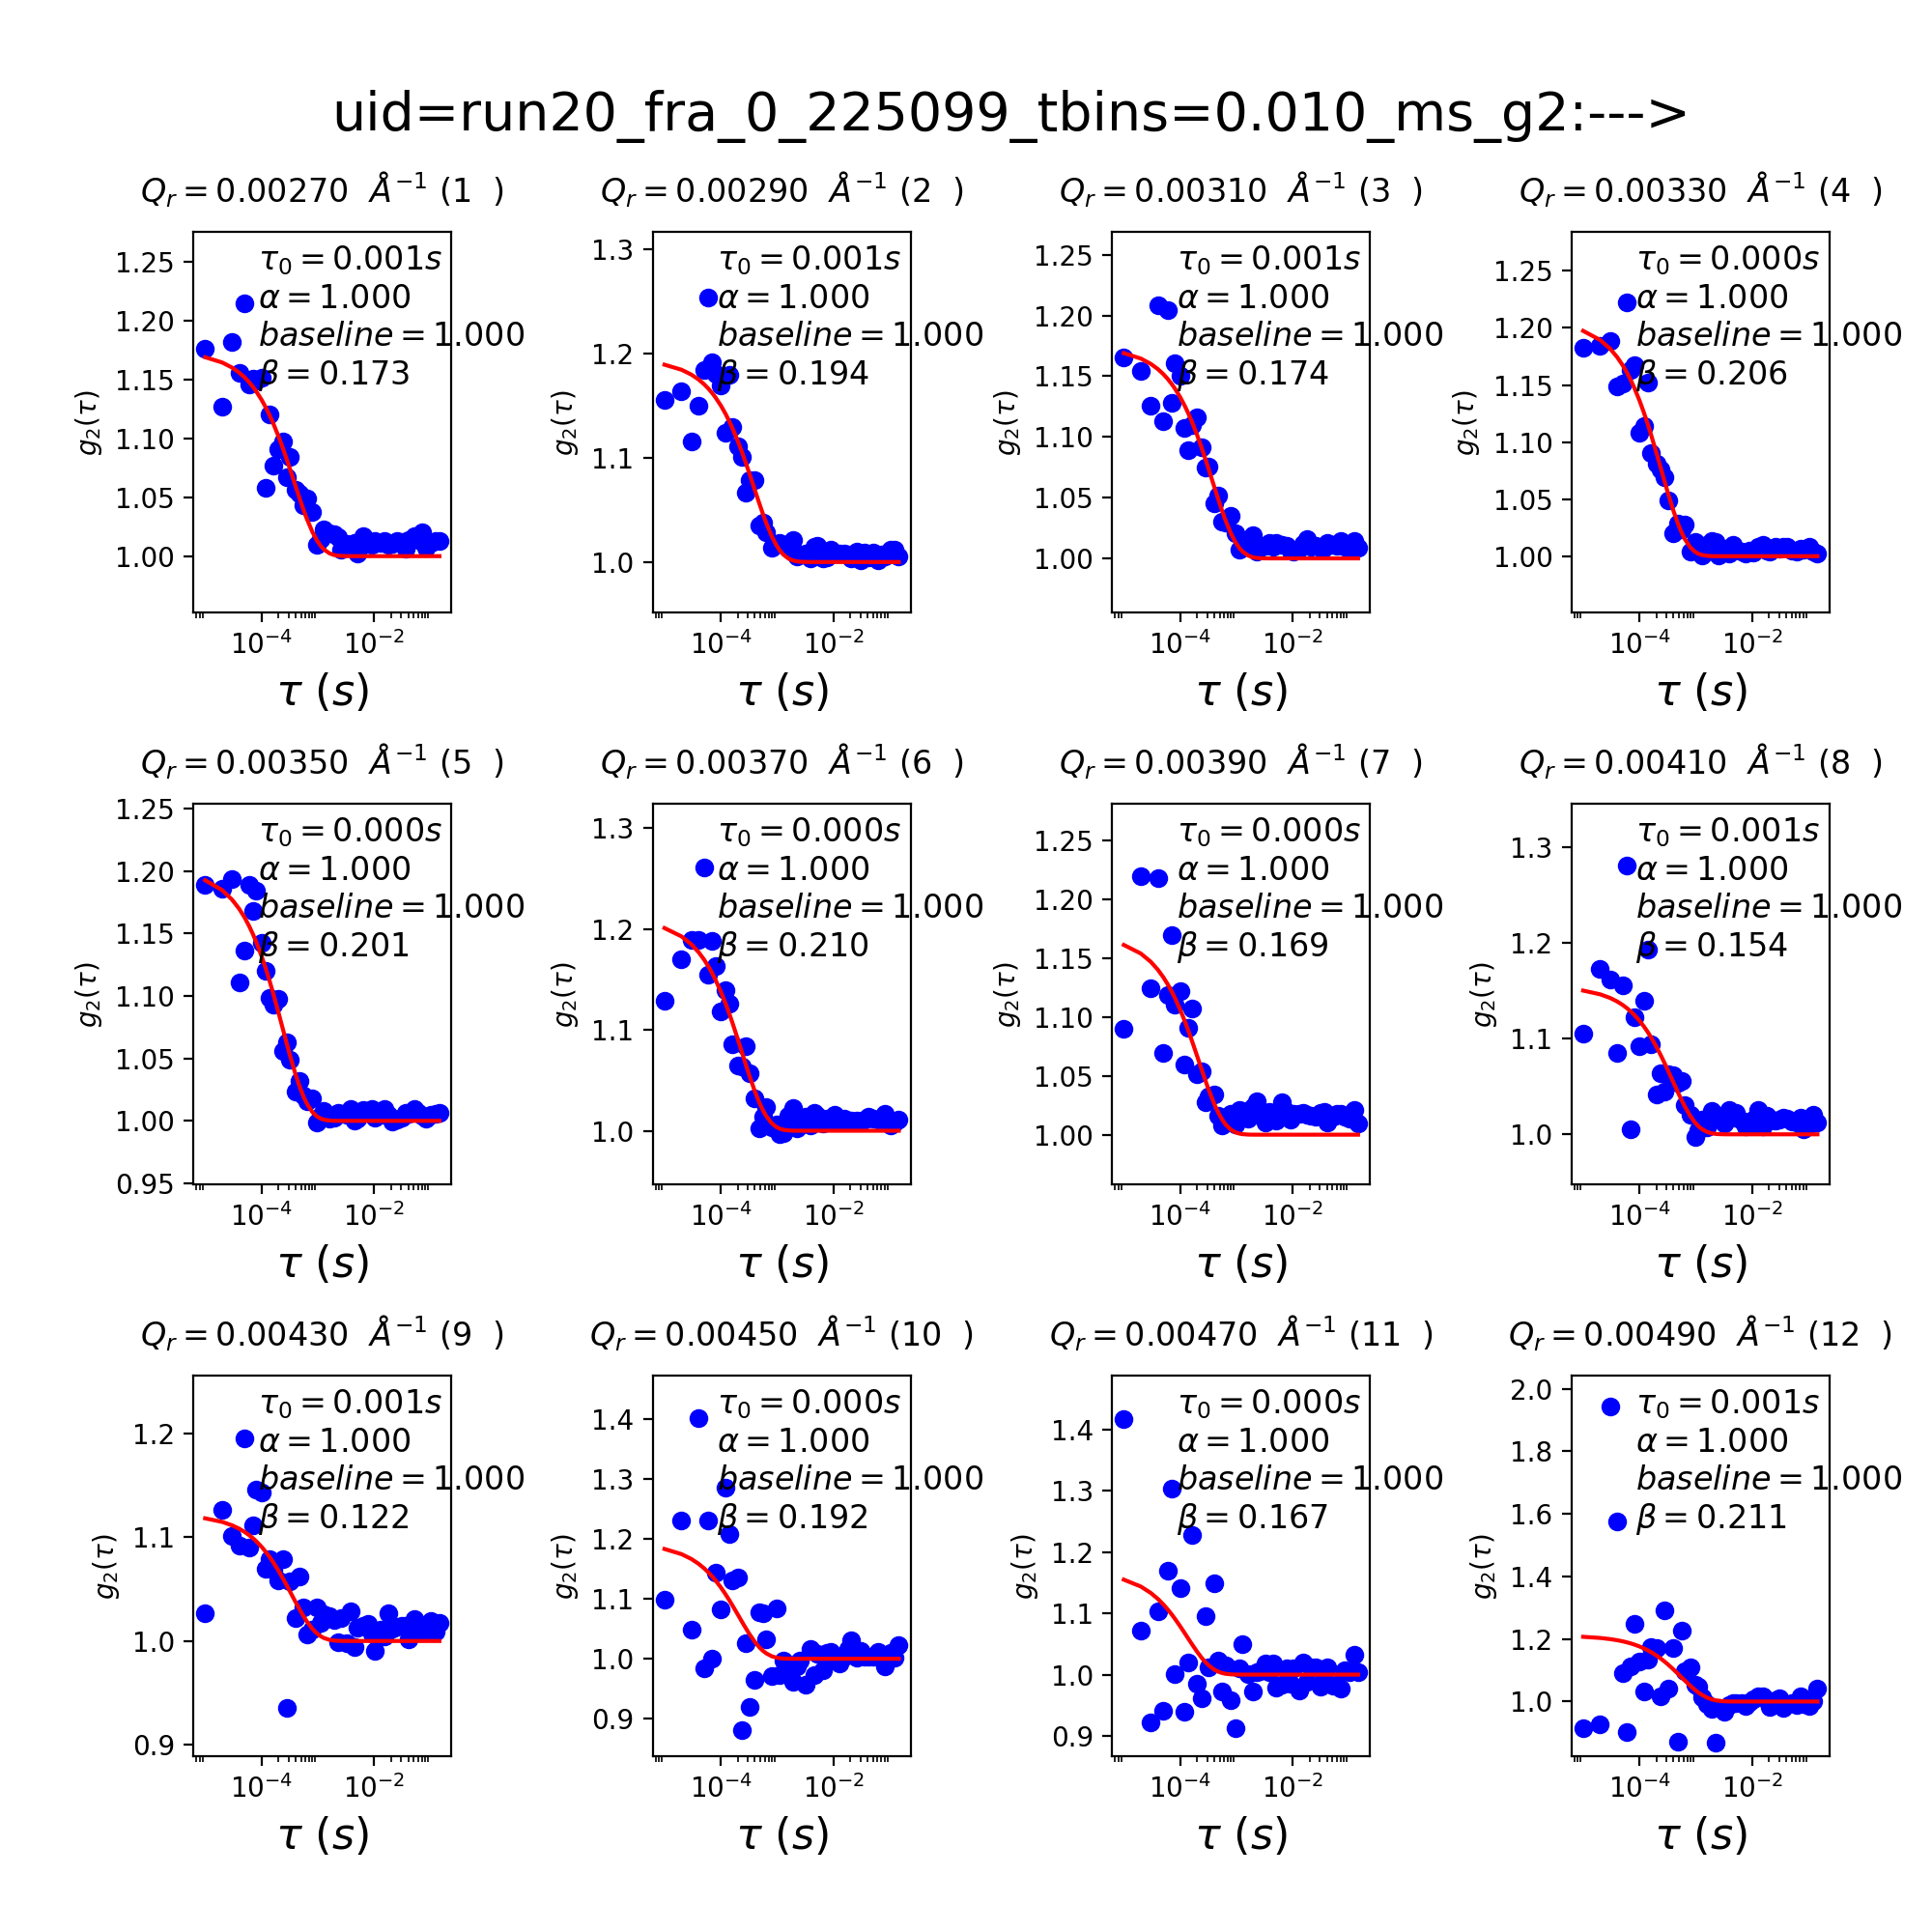

In [1324]:
if run_one_time:
    plot_g2_general( g2_dict={1:g2, 2:g2_fit}, taus_dict={1:taus, 2:taus_fit}, vlim=[0.95, 1.05],
                qval_dict = qval_dict, fit_res= g2_fit_result,  geometry= scat_geometry_,filename= uid_+'_g2', 
        path= out_dir, function= fit_g2_func,  ylabel='g2', append_name=  '_fit')

The fitted diffusion coefficient D0 is:  1.158e+08   A^2S-1


<IPython.core.display.Javascript object>


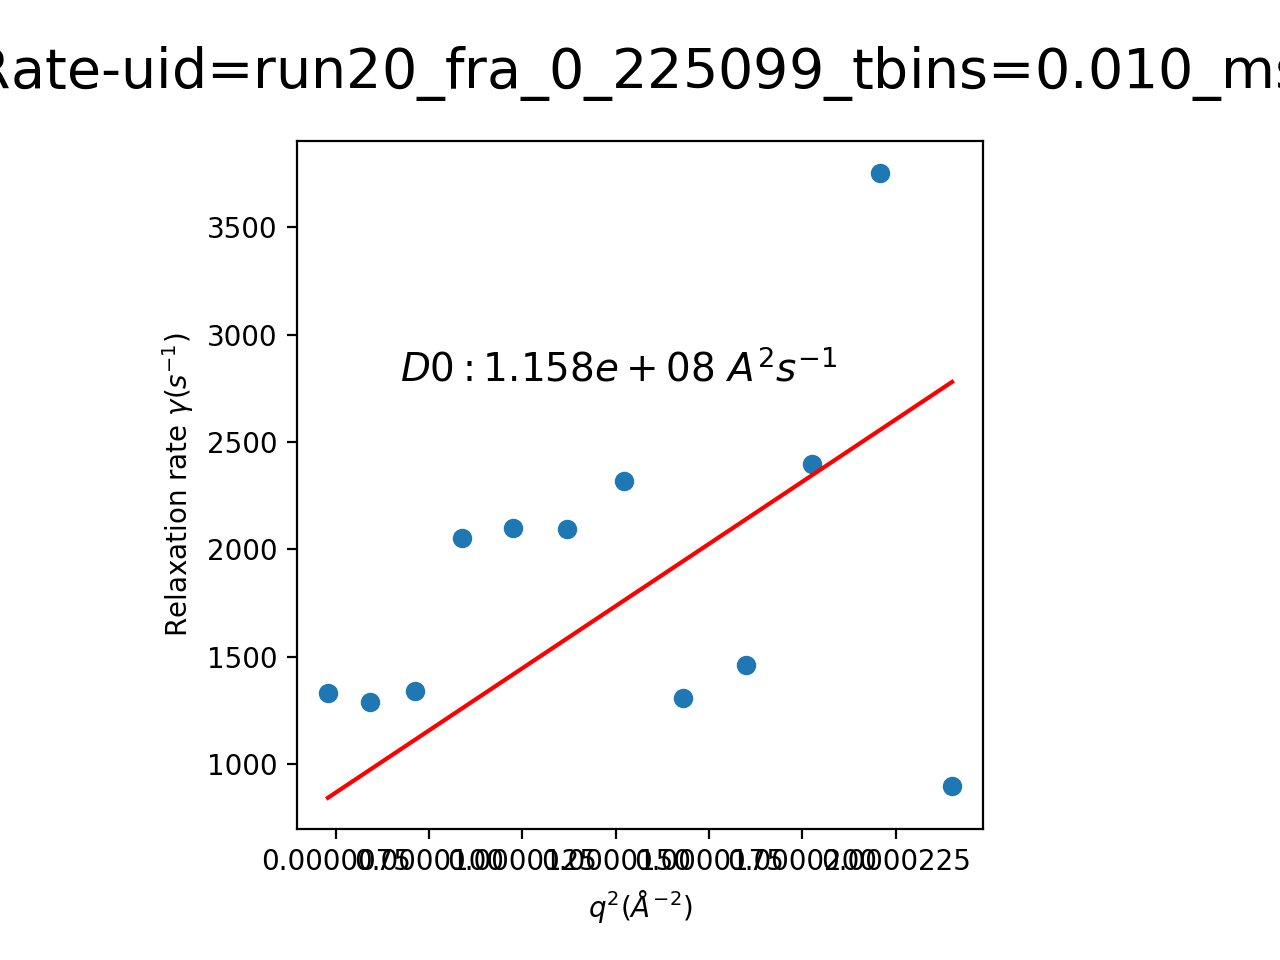

In [1325]:


if run_one_time:
    if False:
        fs, fe = 0, 9
        fs,fe=0, 12
        qval_dict_ = {k:qval_dict[k] for k in list(qval_dict.keys())[fs:fe]  }
        D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe], 
                                                   geometry=  scat_geometry_ )
        plot_q_rate_fit_general( qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe],  qrate_fit_res, 
                                geometry= scat_geometry_,uid=uid_  , path= out_dir )
    else:
        D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict, g2_fit_paras['relaxation_rate'],
                                    fit_range=[0, 26],   geometry= scat_geometry_ )    
        plot_q_rate_fit_general( qval_dict, g2_fit_paras['relaxation_rate'],  qrate_fit_res,   
                            geometry=  scat_geometry_,uid=uid_  ,
                                show_fit= True, path= out_dir, plot_all_range=False)



In [1326]:
%run ~/chxanalys_link/chxanalys/chx_generic_functions.py

In [1327]:
%run ~/chxanalys_link/chxanalys/XPCS_SAXS.py

# Calculation of g2

In [1328]:
get_diffusion_coefficient(   8.9*1e-4, 125*1e-9, T=298)/1e8

1.9619966117121141



g2_q1 = cal_particle_g2( radius=125*1e-9, viscosity=8.9*1e-4, qr=qr,  taus=taus, beta=0.214, T=298)

qr

#taus

g2.shape

fig, ax = plt.subplots()
for i, q1 in enumerate(qr):
    plot1D( x=taus, y= g2_q1[i],   ls='-', m='', logx=True, ax =ax, c=colors[i],  legend=qr[i])
    plot1D( x=taus[1:], y= g2[1:,i], m = markers[i], ls='', logx=True, xlim=[0.000008, 0.01], ylim=[0.98,1.22],
           ax =ax, c=colors[i],   legend= '')
    
        
    

In [1329]:
run_two_time

True

# Two time

In [1330]:
define_good_series = False
define_good_series = True
if define_good_series:
    good_start = 5
    FD2 = Multifile(filename, beg = good_start, end = 20000)
    uid_ = uidstr + '_fra_%s_%s_tbins=%.3f_ms'%(FD2.beg, FD2.end,  tbins*1000 )
    print( uid_ )
else:
    FD2 = FD

uid=run20_fra_5_20000_tbins=0.010_ms


In [1331]:
data_pixel = None
if run_two_time:    
    data_pixel =   Get_Pixel_Arrayc( FD2, pixelist,  norm= norm ).get_data()

100%|██████████| 19995/19995 [00:02<00:00, 6846.93it/s]


In [1332]:
import time
t0=time.time()
g12b=None
if run_two_time:     
    g12b = auto_two_Arrayc(  data_pixel,  roi_mask, index = None   )
    if run_dose:
        np.save( out_dir + 'uid=%s_g12b'%uid, g12b)
run_time( t0 )

100%|██████████| 12/12 [04:24<00:00, 19.18s/it]

Total time: 4.410 min


<IPython.core.display.Javascript object>


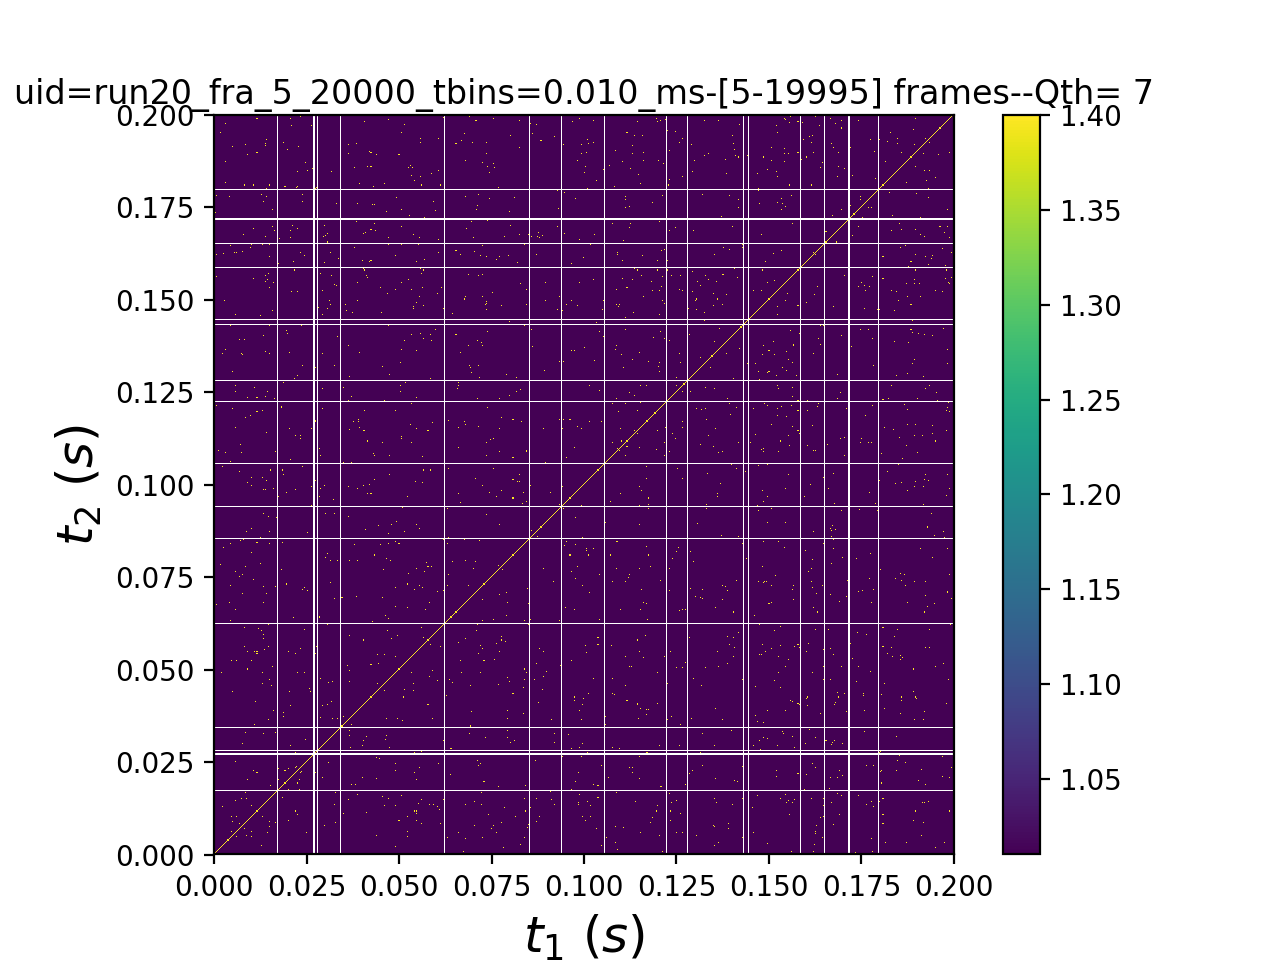

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/image.py:371: RuntimeWarning: invalid value encountered in less
  rgba[..., 1] = A < 0  # under data
/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/image.py:372: RuntimeWarning: invalid value encountered in greater
  rgba[..., 2] = A > 1  # over data


In [1333]:
if run_two_time:
    show_C12(g12b, q_ind= 6, N1= FD2.beg,logs=False, N2=min( FD2.end,100000), vmin= 1.01, vmax=1.4, 
             timeperframe=timeperframe,save=True, path= out_dir, uid = uid_ )

In [1334]:
multi_tau_steps = True
if run_two_time:
    if lag_steps is None:
        num_bufs=8
        noframes = FD.end - FD.beg
        num_levels = int(np.log( noframes/(num_bufs-1))/np.log(2) +1) +1
        tot_channels, lag_steps, dict_lag = multi_tau_lags(num_levels, num_bufs)
        max_taus= lag_steps.max()
        
    #max_taus= lag_steps.max()  
    max_taus = Nimg    
    t0=time.time()
    #tausb = np.arange( g2b.shape[0])[:max_taus] *timeperframe
    if multi_tau_steps:
        lag_steps_ = lag_steps[   lag_steps <= g12b.shape[0] ]
        g2b = get_one_time_from_two_time(g12b)[lag_steps_]
        tausb = lag_steps_ *timeperframe
    else:
        tausb = (np.arange( g12b.shape[0]) *timeperframe)[:-200]
        g2b = (get_one_time_from_two_time(g12b))[:-200]
    run_time(t0)
         
    g2b_pds = save_g2_general( g2b, taus=tausb, qr= np.array( list( qval_dict.values() ) )[:,0],
                              qz=None, uid=uid_ +'_g2b.csv', path= out_dir, return_res=True )

Total time: 28.201 sec
The correlation function is saved in /home/yuzhang/Analysis/Timepix/2017_3/Results/run20/ with filename as uid=run20_fra_5_20000_tbins=0.010_ms_g2b.csv


/opt/conda_envs/analysis/lib/python3.5/site-packages/chxanalys-unknown-py3.5.egg/chxanalys/Two_Time_Correlation_Function.py:960: RuntimeWarning: Mean of empty slice


In [1335]:
if run_two_time:    
    g2b_fit_result, tausb_fit, g2b_fit = get_g2_fit_general( g2b,  tausb, 
                function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
            fit_variables={'baseline':False, 'beta': True, 'alpha':False,'relaxation_rate':True},                                  
            guess_values={'baseline':1.0,'beta': 0.15,'alpha':1.0,'relaxation_rate':1,},
            guess_limits = dict( baseline =[1, 1.8], alpha=[0, 2],
                        beta = [0, 1], relaxation_rate= [0.000001, 5000]) ) 
    g2b_fit_paras = save_g2_fit_para_tocsv(g2b_fit_result,  filename= uid_  +'_g2b_fit_paras.csv', path= out_dir )

The g2 fitting parameters are saved in /home/yuzhang/Analysis/Timepix/2017_3/Results/run20/uid=run20_fra_5_20000_tbins=0.010_ms_g2b_fit_paras.csv


<IPython.core.display.Javascript object>


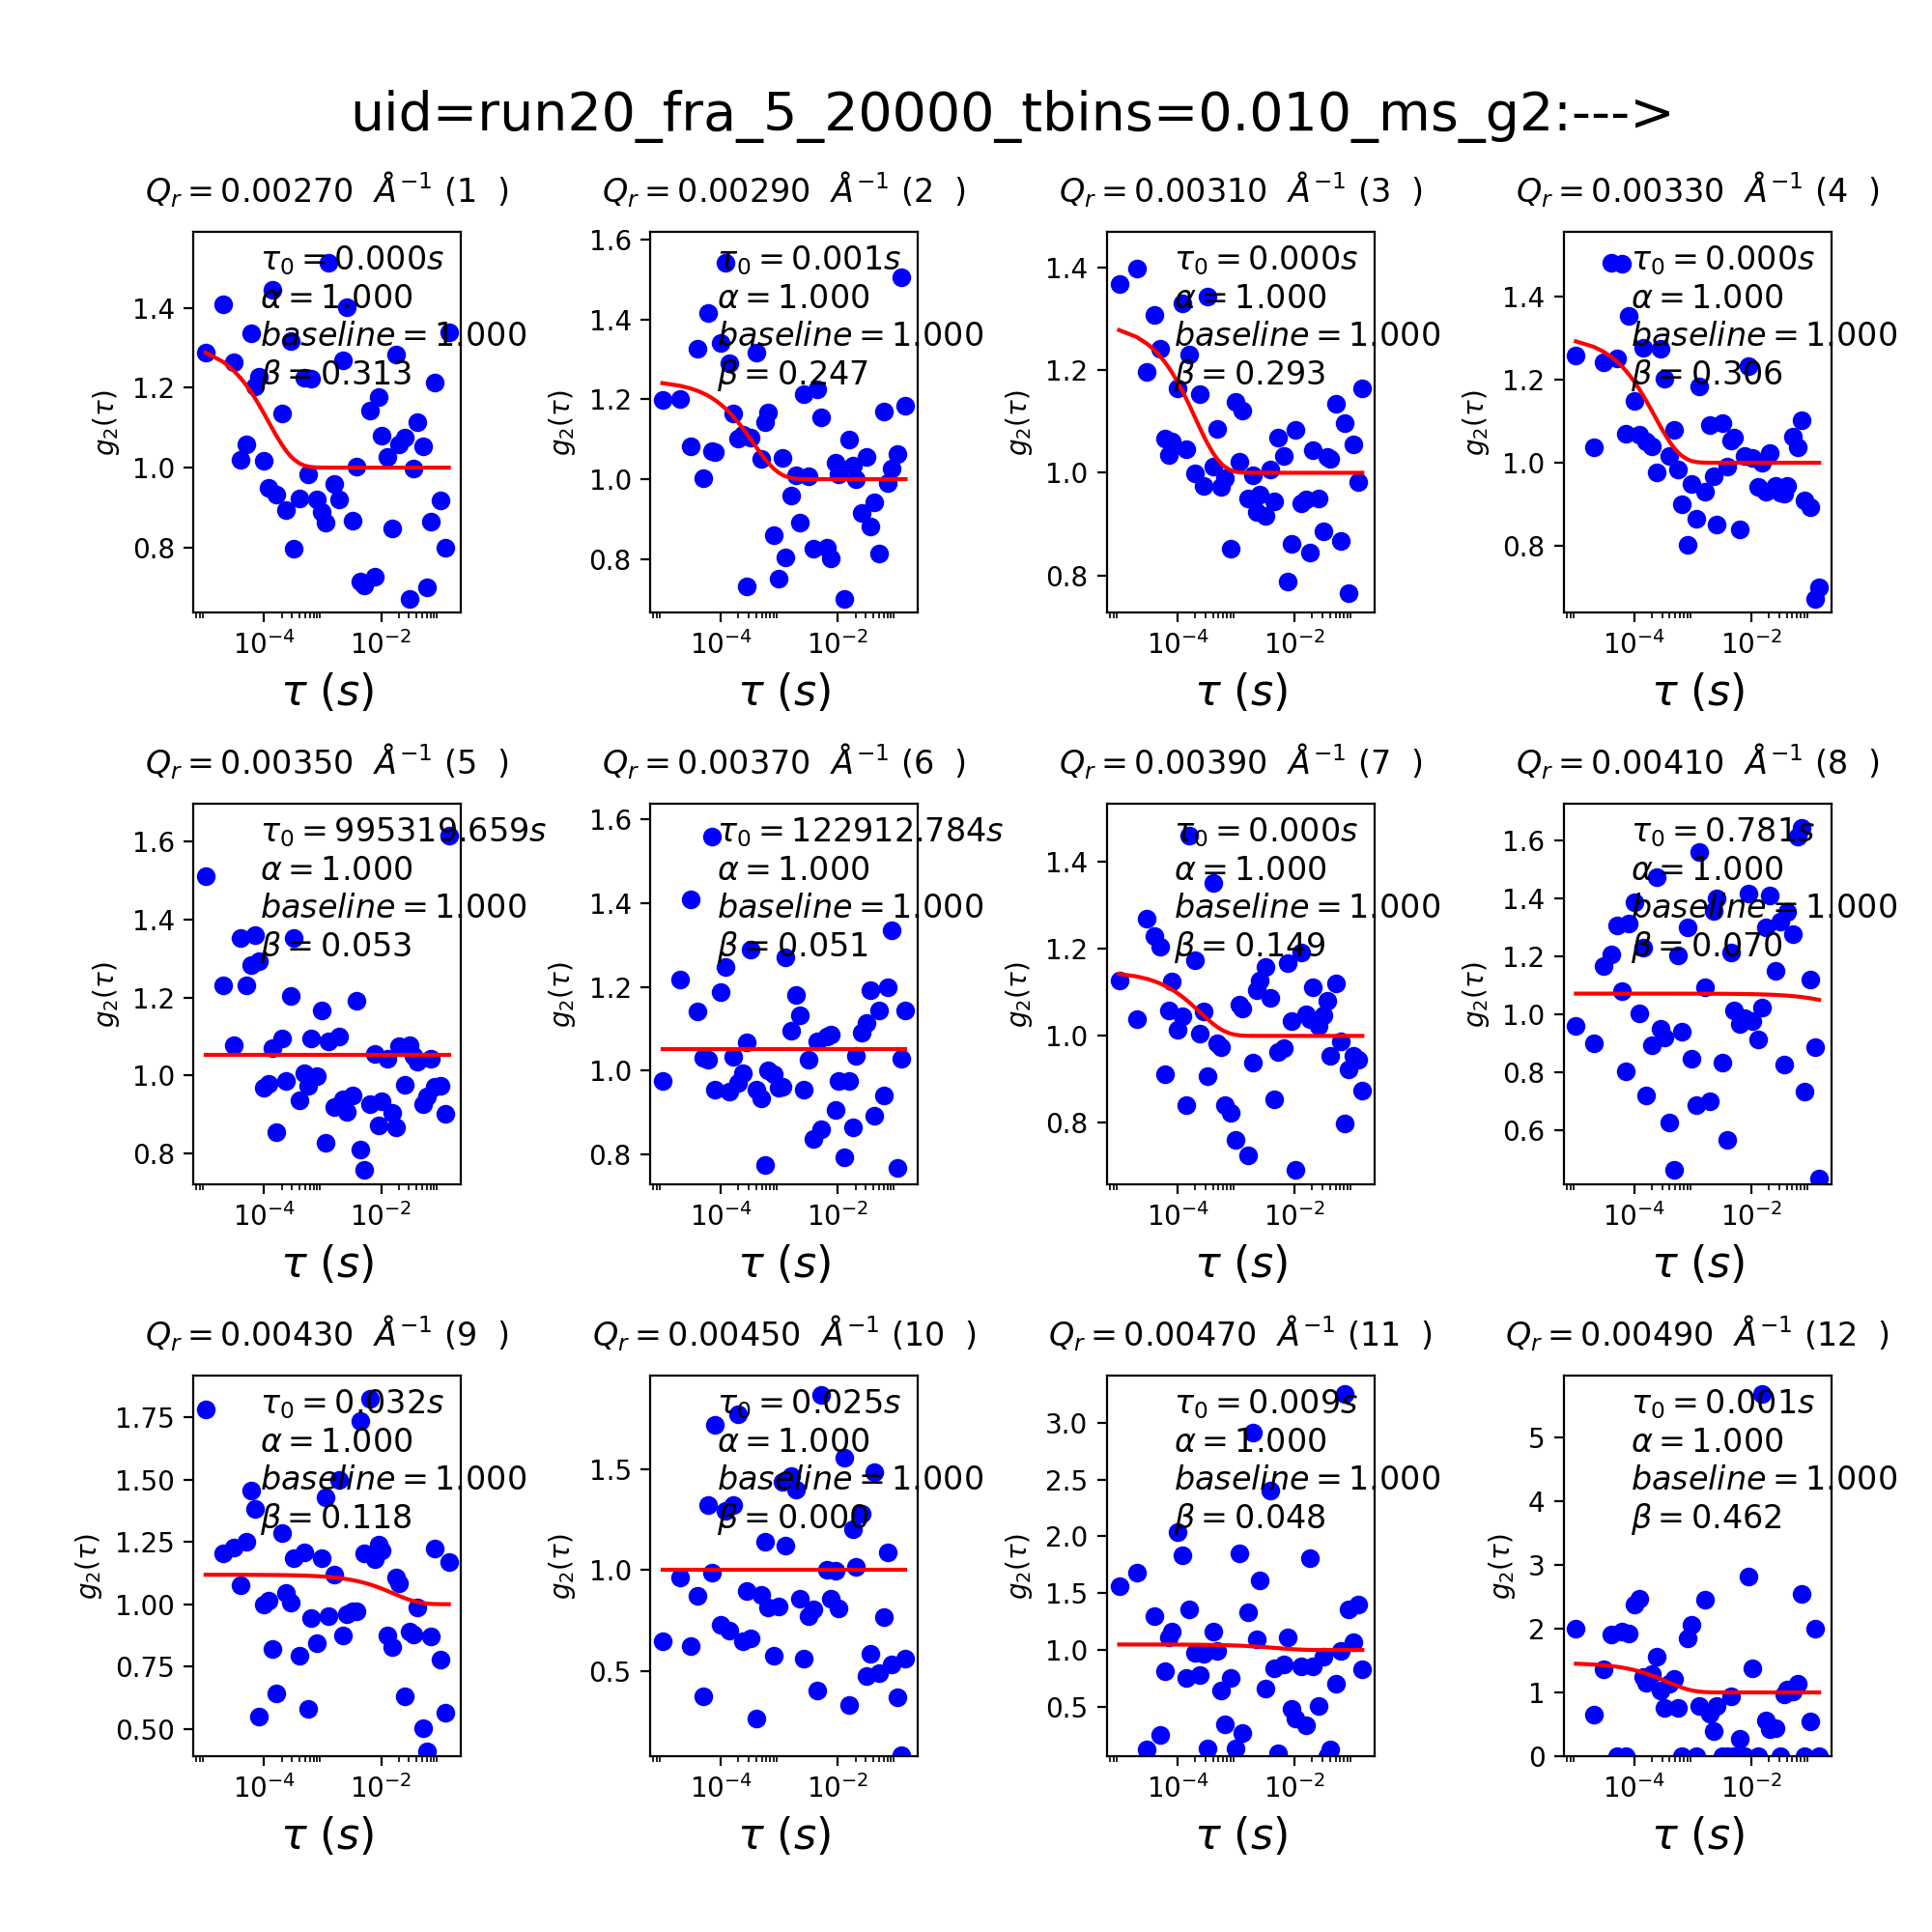

In [1336]:
if run_two_time:
    plot_g2_general( g2_dict={1:g2b, 2:g2b_fit}, taus_dict={1:tausb, 2:tausb_fit}, vlim=[0.95, 1.05],
                qval_dict=qval_dict, fit_res= g2b_fit_result,  geometry=scat_geometry_,filename=uid_+'_g2', 
                    path= out_dir, function= fit_g2_func,  ylabel='g2', append_name=  '_b_fit')

The fitted diffusion coefficient D0 is:  4.969e+07   A^2S-1


<IPython.core.display.Javascript object>


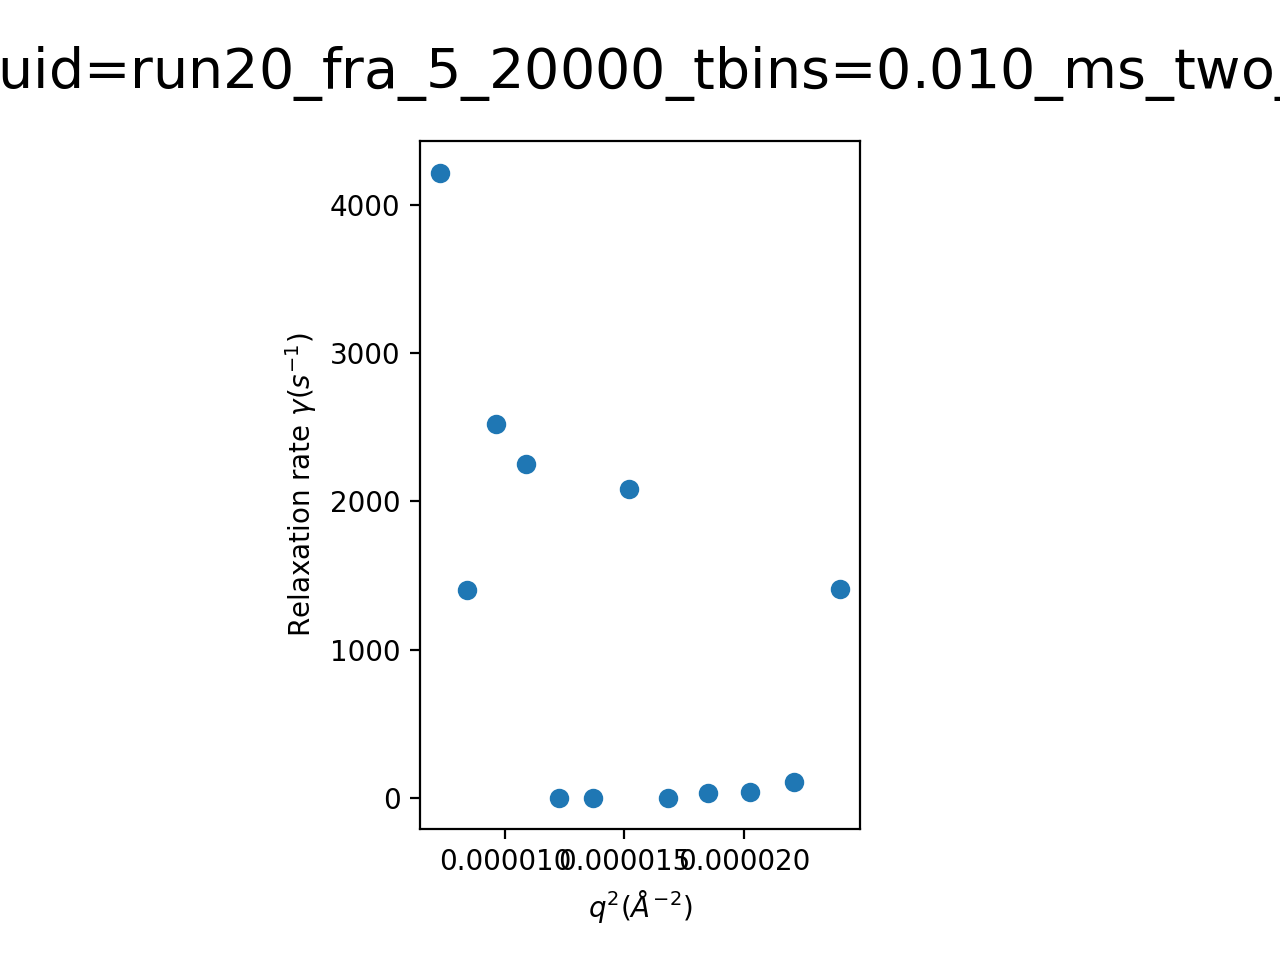

In [1337]:
if run_two_time:    
    if False:
        fs, fe = 0,9
        fs, fe = 0,12
        qval_dict_ = {k:qval_dict[k] for k in list(qval_dict.keys())[fs:fe]  }
        D0b, qrate_fit_resb = get_q_rate_fit_general(  qval_dict_, g2b_fit_paras['relaxation_rate'][fs:fe], geometry= scat_geometry_ )
        plot_q_rate_fit_general( qval_dict_, g2b_fit_paras['relaxation_rate'][fs:fe],  qrate_fit_resb, 
                            geometry= scat_geometry_,uid=uid_ +'_two_time' , path= out_dir )
    else:
    
        D0b, qrate_fit_resb = get_q_rate_fit_general(  qval_dict, g2b_fit_paras['relaxation_rate'],
                                        fit_range=[1, 10],  geometry= scat_geometry_ )
        plot_q_rate_fit_general( qval_dict, g2b_fit_paras['relaxation_rate'],  qrate_fit_resb,   
                            geometry= scat_geometry_,uid=uid_ +'_two_time', show_fit=False,path= out_dir, plot_all_range= True )

<IPython.core.display.Javascript object>


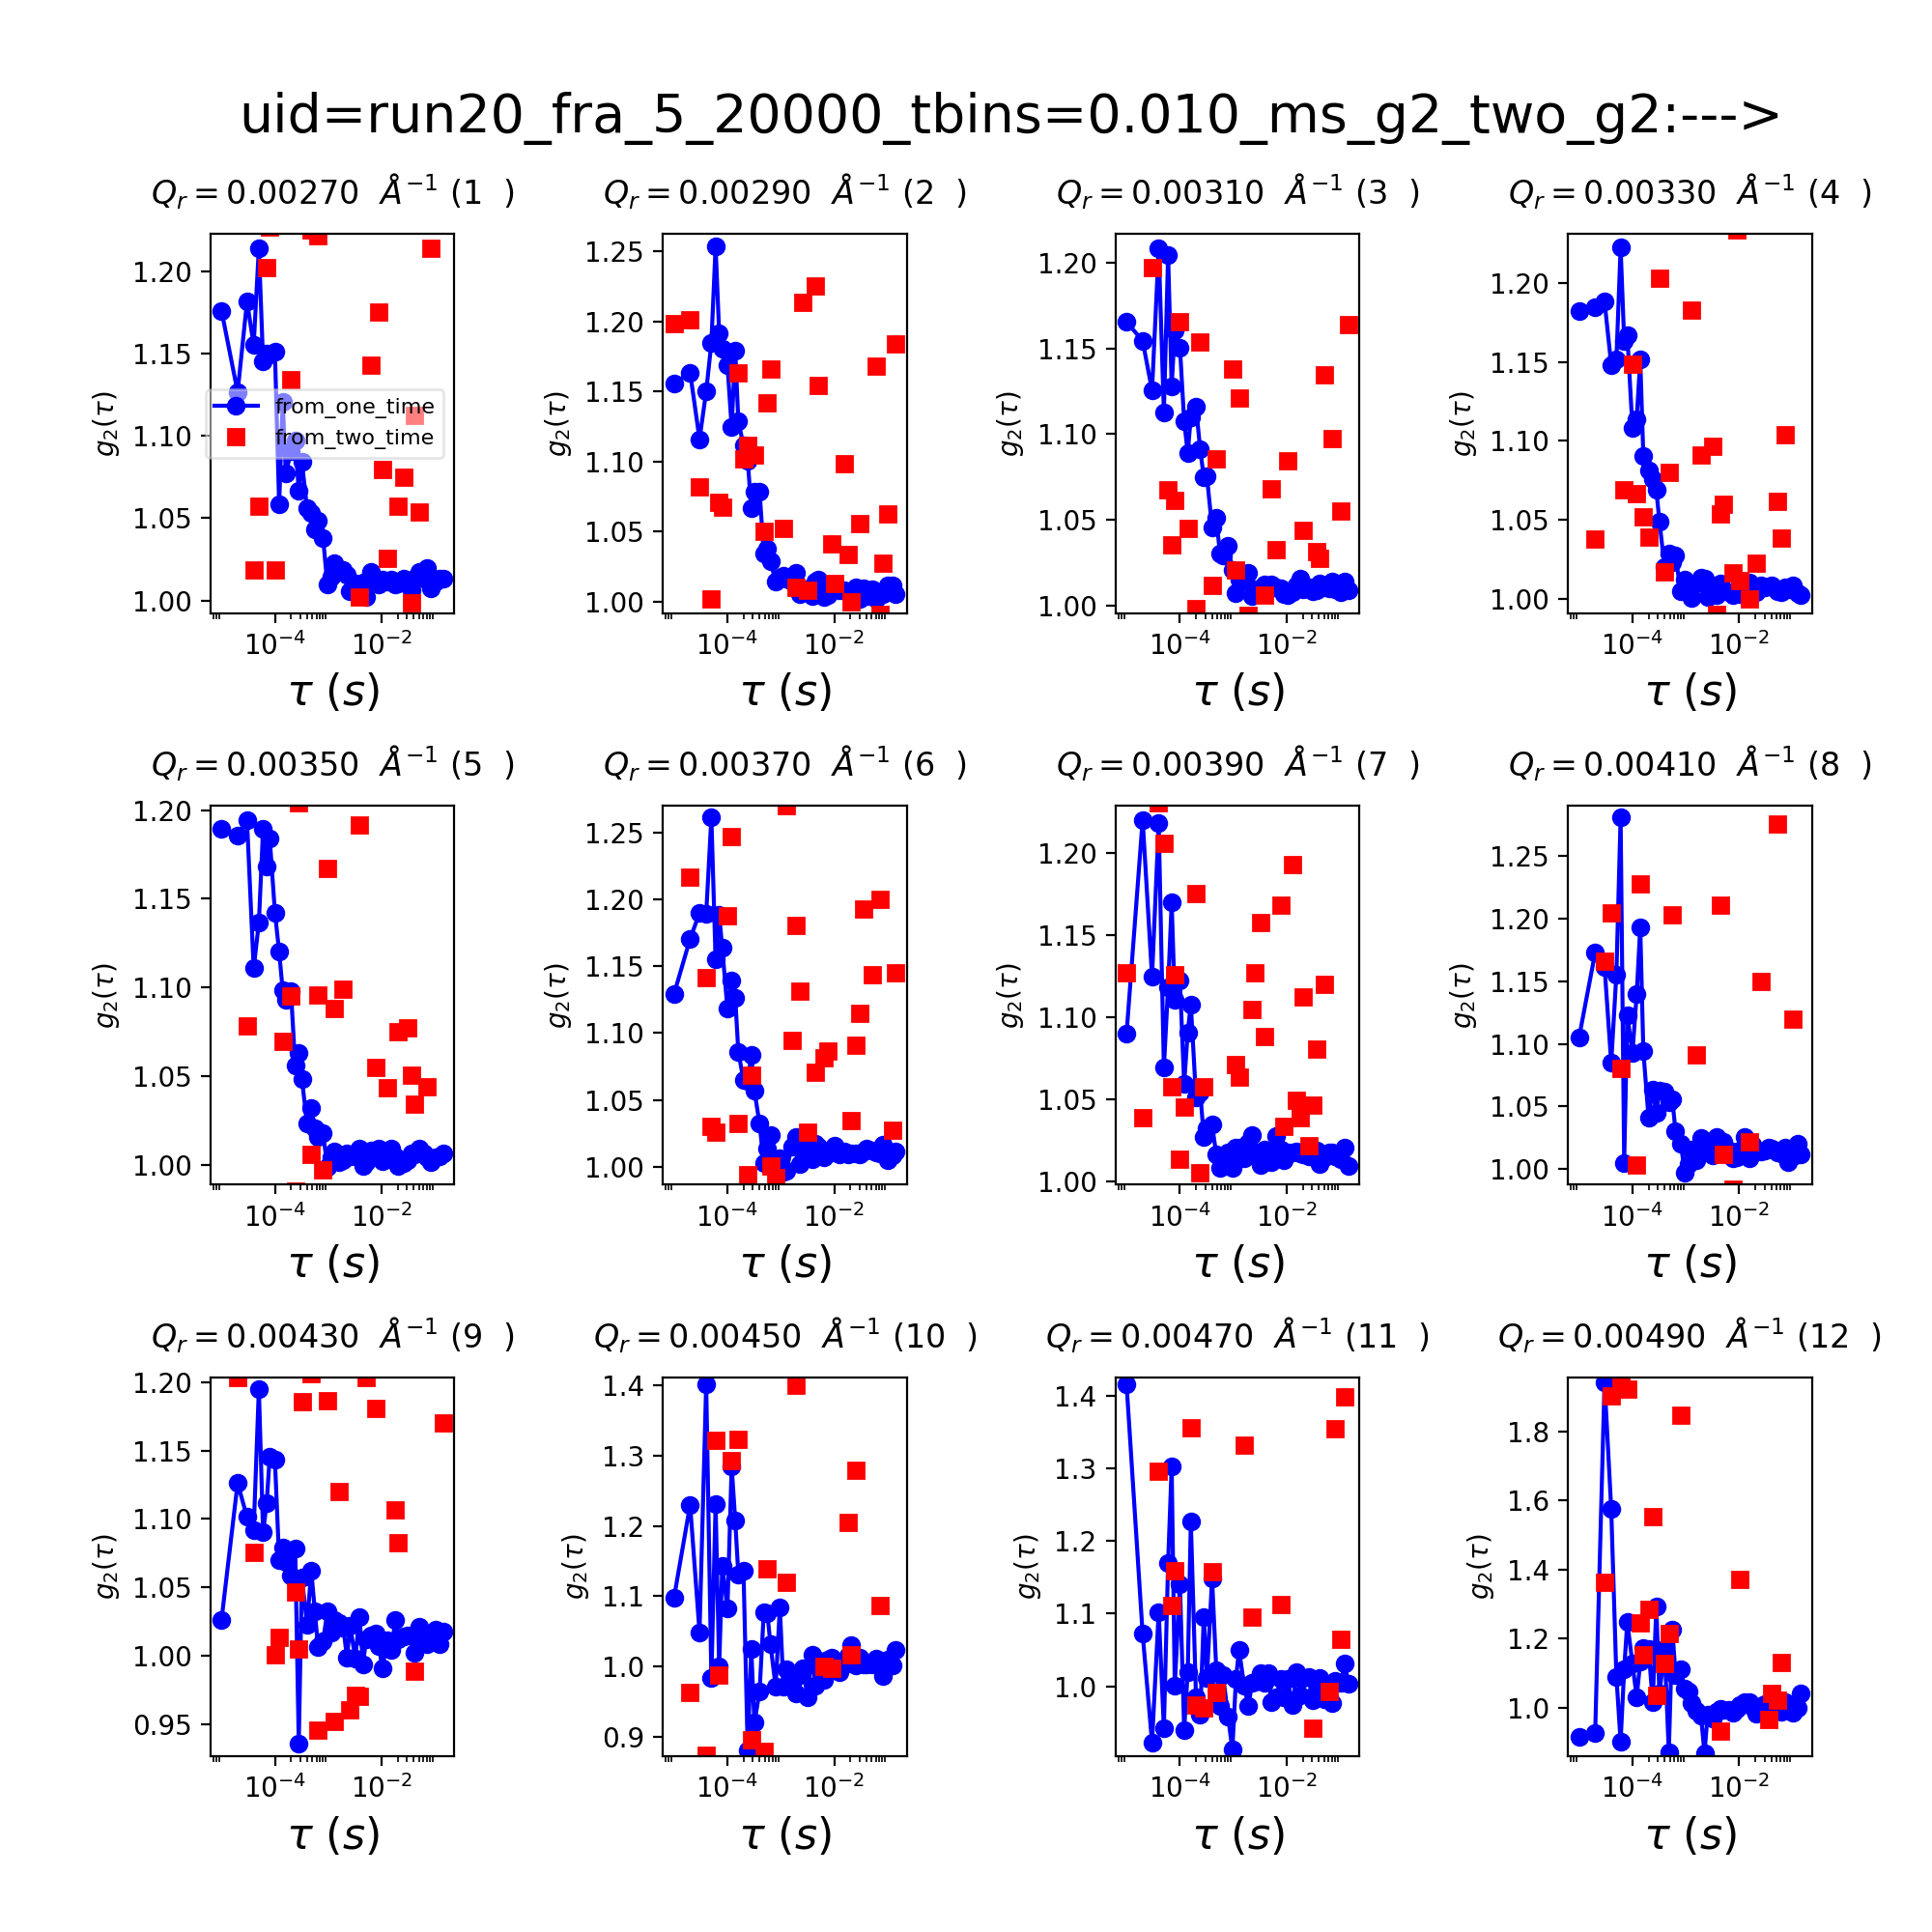

In [1338]:
if run_two_time and run_one_time:
    plot_g2_general( g2_dict={1:g2, 2:g2b}, taus_dict={1:taus, 2:tausb},vlim=[0.99, 1.007],
                qval_dict=qval_dict, g2_labels=['from_one_time', 'from_two_time'],
            geometry=scat_geometry_,filename=uid_+'_g2_two_g2', path= out_dir, ylabel='g2', )

In [1339]:
#bad_frame_list

In [1340]:
run_dose

False

In [1341]:
uid,pdf_version

('run20_pos20', '_11-24-2017')

In [1342]:
%run /home/yuzhang/chxanalys_link/chxanalys/Create_Report.py

# Make PDF here

In [1343]:
#pdf_out_dir = os.path.join('/XF11ID/analysis/', CYCLE, username, 'Results/')
pdf_out_dir = out_dir0
pdf_filename = "XPCS_Analysis_Report_for_uid=%s%s_tbin=%s.pdf"%(uid,pdf_version, tbins)

if run_xsvs:
    pdf_filename = "XPCS_XSVS_Analysis_Report_for_uid=%s%s.pdf"%(uid,pdf_version)
    
print(pdf_filename)    

XPCS_Analysis_Report_for_uid=run20_pos20_11-24-2017_tbin=1e-05.pdf


In [1344]:
username = 'yuzhang'
run_fit_form = False
run_invariant_analysis = False
md['beg'] = 0
md['end'] = Nimg
md['number of images'] = Nimg
md['uid_g2'] =  'run%s_fra_%s_%s_tbins=%.3f_ms'%(run,0,Nimg, tbins*1000)
md['uid_c12'] =  'run%s_fra_%s_%s_tbins=%.3f_ms'%(run,FD2.beg, FD2.end, tbins*1000)
md['sample'] = 'SiO2_Janus_Dia250_in_Water'
md['roi_mask_file'] =  out_dir + 'ring_roi_2017_nov24.pkl'



In [1345]:
%run /home/yuzhang/chxanalys_link/chxanalys/Create_Report.py

In [1346]:
make_pdf_report( out_dir, uid, pdf_out_dir, pdf_filename, username, 
                    run_fit_form,run_one_time, run_two_time, run_four_time, run_xsvs, run_dose,
                report_type= scat_geometry, report_invariant= run_invariant_analysis,
               md = md )



****************************************
The pdf report is created with filename as: /home/yuzhang/Analysis/Timepix/2017_3/Results/XPCS_Analysis_Report_for_uid=run20_pos20_11-24-2017_tbin=1e-05.pdf
****************************************
